<a href="https://colab.research.google.com/github/MarMarhoun/freelance_work/blob/main/side_projects/NLP_projs/pretask_malaysia/basic_pretask_Malaysia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project description:

Your task is to predict whether a customer will subscribe to a term deposit.
You are required to present your findings, techniques and approaches utilized to address the above problem.

This aim of this project is to train a machine learning models on the available dataset to train machine learning models that will predict a high accuracy which customers are about to subscribe to a term deposit, which in turn will help the business owner in making useful marketing decisions.

Dataset [link](https://archive.ics.uci.edu/dataset/222/bank+marketing)
File format: PDF, PPT, DOC is acceptable.

> You can find the original project/challenge details [here](https://aserious.larksuite.com/docx/WBQIdzr95okwn7xSoqxubxnhsDg)

In [ ]:
from pprint import pprint

# metadata
pprint(bank_marketing.metadata)

{'abstract': 'The data is related with direct marketing campaigns (phone '
             'calls) of a Portuguese banking institution. The classification '
             'goal is to predict if the client will subscribe a term deposit '
             '(variable y).',
 'additional_info': {'citation': None,
                     'funded_by': None,
                     'instances_represent': None,
                     'preprocessing_description': None,
                     'purpose': None,
                     'recommended_data_splits': None,
                     'sensitive_data': None,
                     'summary': 'The data is related with direct marketing '
                                'campaigns of a Portuguese banking '
                                'institution. The marketing campaigns were '
                                'based on phone calls. Often, more than one '
                                'contact to the same client was required, in '
                                'or

## Data description:

**Context**

"The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y)."

**Content**

Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

The data set includes information about:

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

There are four datasets:
* bank-additional-full.csv with all examples (41188) and 20 inputs, ordered by date (from May 2008 to November 2010), very close to the data analyzed in [Moro et al., 2014]
* bank-additional.csv with 10% of the examples (4119), randomly selected from the first one, and 20 inputs.
* bank-full.csv with all examples and 17 inputs, ordered by date (older version of this dataset with less inputs).
* bank.csv with 10% of the examples and 17 inputs, randomly selected from 3 (older version of this dataset with less inputs).

The smallest datasets are provided to test more computationally demanding machine learning algorithms (e.g., SVM).

The classification goal is to predict if the client will subscribe (yes/no) a term deposit (variable y).




## Packages installation:

In [ ]:
# Dataset
!pip install ucimlrepo

> # Load and preprocess the data

In [ ]:
# Import libraries

import pandas as pd
import numpy as np
from tqdm import tqdm

from ucimlrepo import fetch_ucirepo

# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import recall_score, precision_score, accuracy_score
from sklearn.model_selection import train_test_split


In [ ]:
######### Exploring the dataset

# metadata
#print(bank_marketing.metadata)

# metadata
pprint(bank_marketing.metadata)

{'abstract': 'The data is related with direct marketing campaigns (phone '
             'calls) of a Portuguese banking institution. The classification '
             'goal is to predict if the client will subscribe a term deposit '
             '(variable y).',
 'additional_info': {'citation': None,
                     'funded_by': None,
                     'instances_represent': None,
                     'preprocessing_description': None,
                     'purpose': None,
                     'recommended_data_splits': None,
                     'sensitive_data': None,
                     'summary': 'The data is related with direct marketing '
                                'campaigns of a Portuguese banking '
                                'institution. The marketing campaigns were '
                                'based on phone calls. Often, more than one '
                                'contact to the same client was required, in '
                                'or

In [ ]:
from pprint import pprint

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets


# Display the features columns:
X

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  campaign  pdays  previous  \
0            NaN            5   may       261         1     -1         0   
1            NaN            5   may       151         1     -1         0   
2            NaN            5   may        76         1     -1         0   
3            NaN            5   may        92         1     -1         0   
4            NaN            5   may       198         1     -1         0   
...          ...          ...   ...       ...       ...    ...       ...   
45206   cellular           17   nov       977         3     -1         0   
45207   cellular           17   nov       456         2     -1         0   
45208   cellular           17   nov      1127         5    184         3   
45209  telephone           17   nov       508         4     -1         0   
45210   cellular           17   nov       361         2    188        11   

      poutcome  
0          NaN  
1          NaN  
2          NaN  
3          NaN  
4          NaN  
...        ...  
45206      NaN  
45207      NaN  
45208  success  
45209      NaN  
45210    other  

[45211 rows x 16 columns]

In [ ]:
# Features columns

col_data = X.columns
col_data

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [ ]:
# Infos of the data

X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          45211 non-null  int64 
 1   job          44923 non-null  object
 2   marital      45211 non-null  object
 3   education    43354 non-null  object
 4   default      45211 non-null  object
 5   balance      45211 non-null  int64 
 6   housing      45211 non-null  object
 7   loan         45211 non-null  object
 8   contact      32191 non-null  object
 9   day_of_week  45211 non-null  int64 
 10  month        45211 non-null  object
 11  duration     45211 non-null  int64 
 12  campaign     45211 non-null  int64 
 13  pdays        45211 non-null  int64 
 14  previous     45211 non-null  int64 
 15  poutcome     8252 non-null   object
dtypes: int64(7), object(9)
memory usage: 5.5+ MB


In [ ]:
# Describe the data

X.describe().T

count         mean          std     min    25%    50%     75%  \
age          45211.0    40.936210    10.618762    18.0   33.0   39.0    48.0   
balance      45211.0  1362.272058  3044.765829 -8019.0   72.0  448.0  1428.0   
day_of_week  45211.0    15.806419     8.322476     1.0    8.0   16.0    21.0   
duration     45211.0   258.163080   257.527812     0.0  103.0  180.0   319.0   
campaign     45211.0     2.763841     3.098021     1.0    1.0    2.0     3.0   
pdays        45211.0    40.197828   100.128746    -1.0   -1.0   -1.0    -1.0   
previous     45211.0     0.580323     2.303441     0.0    0.0    0.0     0.0   

                  max  
age              95.0  
balance      102127.0  
day_of_week      31.0  
duration       4918.0  
campaign         63.0  
pdays           871.0  
previous        275.0

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_0, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_1, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_2, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_3, *['25%'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_4, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_5, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_6, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_7, *['25%'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_8, *[[['mean', 'std'], ['std', 'min'], ['min', '25%'], ['25%', '50%']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_9, *['count', 'mean', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_10, *['count', 'std', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_11, *['count', 'min', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_12, *['count', '25%', None], **{})
chart

In [ ]:
# Print the target column:
y

y
0       no
1       no
2       no
3       no
4       no
...    ...
45206  yes
45207  yes
45208  yes
45209   no
45210   no

[45211 rows x 1 columns]

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(y, *['y'], **{})
chart

In [ ]:
# Infos of the data

y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       45211 non-null  object
dtypes: object(1)
memory usage: 353.3+ KB


In [ ]:
# variable information
pprint(bank_marketing.variables)

           name     role         type      demographic  \
0           age  Feature      Integer              Age   
1           job  Feature  Categorical       Occupation   
2       marital  Feature  Categorical   Marital Status   
3     education  Feature  Categorical  Education Level   
4       default  Feature       Binary             None   
5       balance  Feature      Integer             None   
6       housing  Feature       Binary             None   
7          loan  Feature       Binary             None   
8       contact  Feature  Categorical             None   
9   day_of_week  Feature         Date             None   
10        month  Feature         Date             None   
11     duration  Feature      Integer             None   
12     campaign  Feature      Integer             None   
13        pdays  Feature      Integer             None   
14     previous  Feature      Integer             None   
15     poutcome  Feature  Categorical             None   
16            

In [ ]:
# Exploring the dataset

bank_marketing.data.items

{'ids': None,
 'features':        age           job   marital  education default  balance housing loan  \
 0       58    management   married   tertiary      no     2143     yes   no   
 1       44    technician    single  secondary      no       29     yes   no   
 2       33  entrepreneur   married  secondary      no        2     yes  yes   
 3       47   blue-collar   married        NaN      no     1506     yes   no   
 4       33           NaN    single        NaN      no        1      no   no   
 ...    ...           ...       ...        ...     ...      ...     ...  ...   
 45206   51    technician   married   tertiary      no      825      no   no   
 45207   71       retired  divorced    primary      no     1729      no   no   
 45208   72       retired   married  secondary      no     5715      no   no   
 45209   57   blue-collar   married  secondary      no      668      no   no   
 45210   37  entrepreneur   married  secondary      no     2971      no   no   
 
          co

> ## Preprocess the data

We use the LabelEncoder from scikit-learn to convert text labels--Target to integers 0, 1.



In [ ]:
from sklearn.preprocessing import LabelEncoder

lbl_enc = LabelEncoder()
y['target'] = lbl_enc.fit_transform(y.values)

y

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



y  target
0       no       0
1       no       0
2       no       0
3       no       0
4       no       0
...    ...     ...
45206  yes       1
45207  yes       1
45208  yes       1
45209   no       0
45210   no       0

[45211 rows x 2 columns]

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(y, *['target'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(y, *['y'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(y, *['target'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(y, *['target', 'y'], **{'inner': 'box'})
chart

> There two way to manage the NaN values. The first one is to drop them but this will result in losing a lot of data whcih could affect on the trainning and the perfomance of the model. The second method is replace them by one the methods. However, I will try here to drop them since I will use machine learnig models and not DL methods. The decond reason why I chose to drop them is this is just a pre-task.

In [ ]:
## To drop the nan values you can either handle the features and target separatly or you can gather them and then process them. The last one is what I chosed for the rest of this notebook.

# replace null values with nan
X.replace('',np.nan,inplace=True)
y.replace('',np.nan,inplace=True)

<ipython-input-24-ffee5ef1136d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace('',np.nan,inplace=True)
<ipython-input-24-ffee5ef1136d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace('',np.nan,inplace=True)


In [ ]:
# replace null values with nan
X.replace(' ',np.nan,inplace=True)
y.replace(' ',np.nan,inplace=True)

<ipython-input-25-2a072f5bfbe4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace(' ',np.nan,inplace=True)
<ipython-input-25-2a072f5bfbe4>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y.replace(' ',np.nan,inplace=True)


In [ ]:
# drop nan values in the data
X.dropna(axis=0, how='any', inplace=True)

<ipython-input-26-73fcb6a9fb30>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.dropna(axis=0, how='any', inplace=True)


In [ ]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 24060 to 45210
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          7842 non-null   int64 
 1   job          7842 non-null   object
 2   marital      7842 non-null   object
 3   education    7842 non-null   object
 4   default      7842 non-null   object
 5   balance      7842 non-null   int64 
 6   housing      7842 non-null   object
 7   loan         7842 non-null   object
 8   contact      7842 non-null   object
 9   day_of_week  7842 non-null   int64 
 10  month        7842 non-null   object
 11  duration     7842 non-null   int64 
 12  campaign     7842 non-null   int64 
 13  pdays        7842 non-null   int64 
 14  previous     7842 non-null   int64 
 15  poutcome     7842 non-null   object
dtypes: int64(7), object(9)
memory usage: 1.0+ MB


In [ ]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   y       45211 non-null  object
 1   target  45211 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 706.5+ KB


In [ ]:
#### The chosen method to handle and remove the NaN values.

dst = X.copy()
dst['target'] = y.target
dst

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married        NaN      no     1506     yes   no   
4       33           NaN    single        NaN      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  campaign  pdays  previous  \
0            NaN            5   may       261         1     -1         0   
1            NaN            5   may       151         1     -1         0   
2            NaN            5   may        76         1     -1         0   
3            NaN            5   may        92         1     -1         0   
4            NaN            5   may       198         1     -1         0   
...          ...          ...   ...       ...       ...    ...       ...   
45206   cellular           17   nov       977         3     -1         0   
45207   cellular           17   nov       456         2     -1         0   
45208   cellular           17   nov      1127         5    184         3   
45209  telephone           17   nov       508         4     -1         0   
45210   cellular           17   nov       361         2    188        11   

      poutcome  target  
0          NaN       0  
1          NaN       0  
2          NaN       0  
3          NaN       0  
4          NaN       0  
...        ...     ...  
45206      NaN       1  
45207      NaN       1  
45208  success       1  
45209      NaN       0  
45210    other       0  

[45211 rows x 17 columns]

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dst, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dst, *['balance'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dst, *['day_of_week'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dst, *['duration'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(dst, *['marital'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(dst, *['education'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(dst, *['default'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(dst, *['housing'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(dst, *[[['age', 'balance'], ['balance', 'day_of_week'], ['day_of_week', 'duration'], ['duration', 'campaign']]], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dst, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dst, *['balance'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dst, *['day_of_week'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dst, *['duration'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(dst, *['marital', 'education'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(dst, *['education', 'default'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(dst, *['default', 'housing'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(dst, *['housing', 'loan'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(dst, *['age', 'marital'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(dst, *['age', 'education'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(dst, *['age', 'default'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(dst, *['age', 'housing'], **{'inner': 'box'})
chart

In [ ]:
# replace null values with nan
dst.replace('',np.nan,inplace=True)
dst.replace(' ',np.nan,inplace=True)

# drop nan values in the data
dst.dropna(axis=0, how='any', inplace=True)
dst

age           job  marital  education default  balance housing loan  \
24060   33        admin.  married   tertiary      no      882      no   no   
24062   42        admin.   single  secondary      no     -247     yes  yes   
24064   33      services  married  secondary      no     3444     yes   no   
24072   36    management  married   tertiary      no     2415     yes   no   
24077   36    management  married   tertiary      no        0     yes   no   
...    ...           ...      ...        ...     ...      ...     ...  ...   
45199   34   blue-collar   single  secondary      no     1475     yes   no   
45201   53    management  married   tertiary      no      583      no   no   
45204   73       retired  married  secondary      no     2850      no   no   
45208   72       retired  married  secondary      no     5715      no   no   
45210   37  entrepreneur  married  secondary      no     2971      no   no   

         contact  day_of_week month  duration  campaign  pdays  previous  \
24060  telephone           21   oct        39         1    151         3   
24062  telephone           21   oct       519         1    166         1   
24064  telephone           21   oct       144         1     91         4   
24072  telephone           22   oct        73         1     86         4   
24077  telephone           23   oct       140         1    143         3   
...          ...          ...   ...       ...       ...    ...       ...   
45199   cellular           16   nov      1166         3    530        12   
45201   cellular           17   nov       226         1    184         4   
45204   cellular           17   nov       300         1     40         8   
45208   cellular           17   nov      1127         5    184         3   
45210   cellular           17   nov       361         2    188        11   

      poutcome  target  
24060  failure       0  
24062    other       1  
24064  failure       1  
24072    other       0  
24077  failure       1  
...        ...     ...  
45199    other       0  
45201  success       1  
45204  failure       1  
45208  success       1  
45210    other       0  

[7842 rows x 17 columns]

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dst, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dst, *['balance'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dst, *['day_of_week'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(dst, *['duration'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(dst, *['marital'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(dst, *['education'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(dst, *['default'], **{})
chart

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(dst, *['housing'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(dst, *[[['age', 'balance'], ['balance', 'day_of_week'], ['day_of_week', 'duration'], ['duration', 'campaign']]], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dst, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dst, *['balance'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dst, *['day_of_week'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(dst, *['duration'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(dst, *['marital', 'education'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(dst, *['education', 'default'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(dst, *['default', 'housing'], **{})
chart

import numpy as np
from google.colab import autoviz

def heatmap(df, x_colname, y_colname, figscale=1, mpl_palette_name='viridis'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  import pandas as pd
  plt.subplots(figsize=(8 * figscale, 8 * figscale))
  df_2dhist = pd.DataFrame({
      x_label: grp[y_colname].value_counts()
      for x_label, grp in df.groupby(x_colname)
  })
  sns.heatmap(df_2dhist, cmap=mpl_palette_name)
  plt.xlabel(x_colname)
  plt.ylabel(y_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = heatmap(dst, *['housing', 'loan'], **{})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(dst, *['age', 'marital'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(dst, *['age', 'education'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(dst, *['age', 'default'], **{'inner': 'box'})
chart

import numpy as np
from google.colab import autoviz

def violin_plot(df, value_colname, facet_colname, figscale=1, mpl_palette_name='Dark2', **kwargs):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (12 * figscale, 1.2 * figscale * len(df[facet_colname].unique()))
  plt.figure(figsize=figsize)
  sns.violinplot(df, x=value_colname, y=facet_colname, palette=mpl_palette_name, **kwargs)
  sns.despine(top=True, right=True, bottom=True, left=True)
  return autoviz.MplChart.from_current_mpl_state()

chart = violin_plot(dst, *['age', 'housing'], **{'inner': 'box'})
chart

In [ ]:
dst.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 24060 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   age          7842 non-null   int64 
 1   job          7842 non-null   object
 2   marital      7842 non-null   object
 3   education    7842 non-null   object
 4   default      7842 non-null   object
 5   balance      7842 non-null   int64 
 6   housing      7842 non-null   object
 7   loan         7842 non-null   object
 8   contact      7842 non-null   object
 9   day_of_week  7842 non-null   int64 
 10  month        7842 non-null   object
 11  duration     7842 non-null   int64 
 12  campaign     7842 non-null   int64 
 13  pdays        7842 non-null   int64 
 14  previous     7842 non-null   int64 
 15  poutcome     7842 non-null   object
 16  target       7842 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 1.1+ MB


In [ ]:
print(dst.target)

24060    0
24062    1
24064    1
24072    0
24077    1
        ..
45199    0
45201    1
45204    1
45208    1
45210    0
Name: target, Length: 7842, dtype: int64


In [ ]:
# Preprocess the columns

df= dst.copy()
#df.drop('churn_class', axis=1, inplace= True)

col_uniques = {}

for col in df.columns:
  print('Uniques of the',col,'column:\n' , df[col].unique())
  col_uniques[col]= df[col].unique()

Uniques of the age column:
 [33 42 36 44 26 51 30 34 49 47 40 38 54 52 48 45 39 37 43 35 50 56 59 53
 46 32 55 41 57 58 31 60 29 27 28 25 24 22 23 21 83 61 73 19 72 69 62 65
 71 64 20 67 76 68 63 70 74 79 75 77 82 66 80 18 78 81 84 89 86 88]
Uniques of the job column:
 ['admin.' 'services' 'management' 'blue-collar' 'technician' 'unemployed'
 'entrepreneur' 'housemaid' 'retired' 'self-employed' 'student']
Uniques of the marital column:
 ['married' 'single' 'divorced']
Uniques of the education column:
 ['tertiary' 'secondary' 'primary']
Uniques of the default column:
 ['no' 'yes']
Uniques of the balance column:
 [ 882 -247 3444 ...  970 3810 1475]
Uniques of the housing column:
 ['no' 'yes']
Uniques of the loan column:
 ['no' 'yes']
Uniques of the contact column:
 ['telephone' 'cellular']
Uniques of the day_of_week column:
 [21 22 23 25  4  5 10 12 13 17 18 19 20 28 29 30  2  3  6  9 11 16 26 27
 24 31  1  7  8 14 15]
Uniques of the month column:
 ['oct' 'nov' 'jan' 'feb' 'mar' 'apr' 'm

In [ ]:
print(col_uniques.keys())

dict_keys(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'target'])


In [ ]:
# Choose the columns that need to be preprocessed
lbl_enc = LabelEncoder()
cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'campaign', 'poutcome']

def data_encoding(df, column_list, lbl_enc):
  df_new = df.copy()
  df_new[column_list] = df_new[column_list].apply(lbl_enc.fit_transform)
  df_new[column_list] = df_new[column_list].apply(pd.to_numeric, errors='coerce')
  return df_new

df_enc = data_encoding(df, cols, lbl_enc)
df_enc

age  job  marital  education  default  balance  housing  loan  contact  \
24060   33    0        1          2        0      882        0     0        1   
24062   42    0        2          1        0     -247        1     1        1   
24064   33    7        1          1        0     3444        1     0        1   
24072   36    4        1          2        0     2415        1     0        1   
24077   36    4        1          2        0        0        1     0        1   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
45199   34    1        2          1        0     1475        1     0        0   
45201   53    4        1          2        0      583        0     0        0   
45204   73    5        1          1        0     2850        0     0        0   
45208   72    5        1          1        0     5715        0     0        0   
45210   37    2        1          1        0     2971        0     0        0   

       day_of_week  month  duration  campaign  pdays  previous  poutcome  \
24060           21     10        39         0    151         3         0   
24062           21     10       519         0    166         1         1   
24064           21     10       144         0     91         4         0   
24072           22     10        73         0     86         4         1   
24077           23     10       140         0    143         3         0   
...            ...    ...       ...       ...    ...       ...       ...   
45199           16      9      1166         2    530        12         1   
45201           17      9       226         0    184         4         2   
45204           17      9       300         0     40         8         0   
45208           17      9      1127         4    184         3         2   
45210           17      9       361         1    188        11         1   

       target  
24060       0  
24062       1  
24064       1  
24072       0  
24077       1  
...       ...  
45199       0  
45201       1  
45204       1  
45208       1  
45210       0  

[7842 rows x 17 columns]

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_enc, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_enc, *['job'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_enc, *['marital'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(df_enc, *['education'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(df_enc, *[[['age', 'job'], ['job', 'marital'], ['marital', 'education'], ['education', 'default']]], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_enc, *['age'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_enc, *['job'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_enc, *['marital'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(df_enc, *['education'], **{})
chart

In [ ]:
# Infos of the data after processing and cleaning

df_enc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7842 entries, 24060 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   age          7842 non-null   int64
 1   job          7842 non-null   int64
 2   marital      7842 non-null   int64
 3   education    7842 non-null   int64
 4   default      7842 non-null   int64
 5   balance      7842 non-null   int64
 6   housing      7842 non-null   int64
 7   loan         7842 non-null   int64
 8   contact      7842 non-null   int64
 9   day_of_week  7842 non-null   int64
 10  month        7842 non-null   int64
 11  duration     7842 non-null   int64
 12  campaign     7842 non-null   int64
 13  pdays        7842 non-null   int64
 14  previous     7842 non-null   int64
 15  poutcome     7842 non-null   int64
 16  target       7842 non-null   int64
dtypes: int64(17)
memory usage: 1.1 MB


In [ ]:
# Describe the data after processing and cleaning

df_enc.describe().T

count         mean          std     min    25%    50%      75%  \
age          7842.0    40.783856    11.282964    18.0   32.0   38.0    47.00   
job          7842.0     4.288957     3.238534     0.0    1.0    4.0     7.00   
marital      7842.0     1.199821     0.621418     0.0    1.0    1.0     2.00   
education    7842.0     1.206707     0.649716     0.0    1.0    1.0     2.00   
default      7842.0     0.007141     0.084208     0.0    0.0    0.0     0.00   
balance      7842.0  1552.343280  3084.580003 -1884.0  162.0  595.0  1733.75   
housing      7842.0     0.630196     0.482782     0.0    0.0    1.0     1.00   
loan         7842.0     0.138868     0.345830     0.0    0.0    0.0     0.00   
contact      7842.0     0.074598     0.262759     0.0    0.0    0.0     0.00   
day_of_week  7842.0    14.260010     7.885328     1.0    7.0   14.0    20.00   
month        7842.0     5.718057     3.462290     0.0    3.0    8.0     8.00   
duration     7842.0   261.290615   236.203272     5.0  113.0  194.0   324.00   
campaign     7842.0     1.064269     1.566109     0.0    0.0    1.0     1.00   
pdays        7842.0   223.252869   111.830127     1.0  133.0  195.0   326.00   
previous     7842.0     3.184264     4.614190     1.0    1.0    2.0     4.00   
poutcome     7842.0     0.583525     0.776832     0.0    0.0    0.0     1.00   
target       7842.0     0.227748     0.419406     0.0    0.0    0.0     0.00   

                 max  
age             89.0  
job             10.0  
marital          2.0  
education        2.0  
default          1.0  
balance      81204.0  
housing          1.0  
loan             1.0  
contact          1.0  
day_of_week     31.0  
month           11.0  
duration      2219.0  
campaign        15.0  
pdays          871.0  
previous       275.0  
poutcome         2.0  
target           1.0

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_13, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_14, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_15, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_16, *['25%'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_17, *['mean'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_18, *['std'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_19, *['min'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_20, *['25%'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_21, *[[['mean', 'std'], ['std', 'min'], ['min', '25%'], ['25%', '50%']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_22, *['count', 'mean', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_23, *['count', 'std', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_24, *['count', 'min', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_25, *['count', '25%', None], **{})
chart

> # Exploratory Data Analysis (EDA)

In [ ]:
## ref: https://www.kaggle.com/code/omarmostafataha/customer-churn-eda-seaborn-and-plotly-streamlit
#This function takes one column and visualize plotly Pie chart
def pie(df,col):
    data=df[col].value_counts()
    fig=px.pie(data,values=data.values,names=data.index,title=f"{col} Pie Plot",width=400);
    plt.gcf().set_size_inches((18, 10))
    fig.show()

#This function takes one column and Hue then visualize seaborn Histogram
def hist(col,set_hue=None):
    plt.figure(figsize=(8,6))
    sns.histplot(data=df,x=col,kde=True,hue=set_hue,multiple='stack');
    plt.title(f'{col} Distribution')
    plt.show()

#This function takes one column and Hue then visualize seaborn countplot
def count(col,set_hue=None):
    plt.figure(figsize=(6,6))
    sns.countplot(data=df,x=df[col],hue=set_hue);
    plt.show();

#This function takes dataframe , 1:4 columns ,hue and palette then visualize seaborn countplots
def count_group(df,cols,set_hue=None,set_palette=None):
    colors=['red','green','blue','yellow']
    fig , ax = plt.subplots(1,len(cols),figsize=(7*len(cols),6))
    for i , col in enumerate(cols):
        sns.countplot(
                      data=df
                      ,x=col
                      ,ax=ax[i]
                      ,color=colors[i]
                      ,hue=set_hue
                      ,palette=set_palette)
        ax[i].set_title(f'{col} Count Plot')

    plt.show()

#This function is to show churn rate as a bar plot
def churn_rate(df,col,hue=None):
    sns.barplot(data=df,x=col,y='target',hue=hue,ci=None)
    plt.title(f'{col} target Rate')
    plt.show()

In [ ]:
# check the number of null values per column
print(df_enc.isnull().sum())

age            0
job            0
marital        0
education      0
default        0
balance        0
housing        0
loan           0
contact        0
day_of_week    0
month          0
duration       0
campaign       0
pdays          0
previous       0
poutcome       0
target         0
dtype: int64


not_subscribed:  6056 , subscribed:  1786


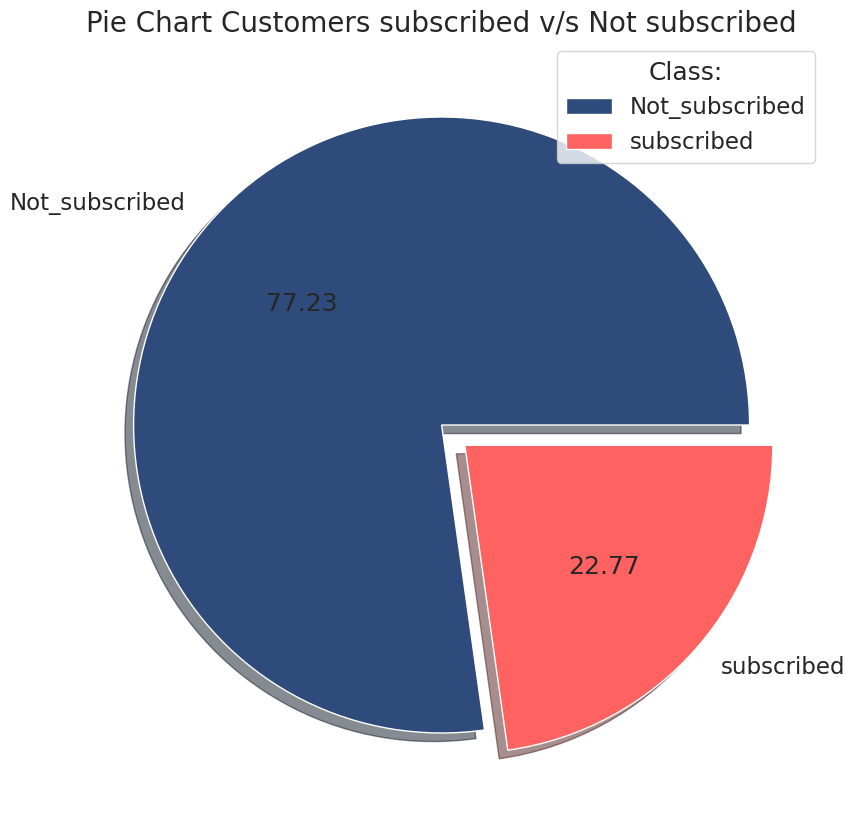

In [ ]:
# Check the class imbalance:

not_subscribed = df_enc[df_enc['target']==0]['target'].count()
subscribed = df_enc[df_enc['target']==1]['target'].count()
print('not_subscribed: ',not_subscribed,', subscribed: ',subscribed)

#
my_colors = ['#2f4b7c','#ff6361']   #lightblue      # 'lightsteelblue'] #, 'silver']
labels  = ['Not_subscribed','subscribed']
my_explode = (0, 0.1)
plt.pie([not_subscribed,subscribed], labels=labels,autopct='%.2f', startangle=0, shadow=True, colors=my_colors , explode=my_explode,  ) # colors='red',labeldistance=1)  #
plt.title('Pie Chart Customers subscribed v/s Not subscribed', fontsize = 20)
plt.legend(title = 'Class:', loc='best' )
plt.gcf().set_size_inches((18, 10))
plt.show()

> Check this [link](https://www.learnui.design/tools/data-color-picker.html#palette) for more colors

In [ ]:
# # Checking Imbalance in Data

%matplotlib inline
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff

# Defining all our palette colours.
primary_blue = "#496595"
primary_blue2 = "#85a1c1"
primary_grey2 = "#3f4d63"
primary_grey = "#c6ccd8"
primary_black = "#202022"
primary_bgcolor = "#f4f0ea"
primary_red = "#ff6361"

primary_green = px.colors.qualitative.Plotly[2]

In [ ]:
# Now we are going to take a look about the target distribution and the messages length.

balance_counts = df_enc.groupby('target')['target'].agg('count').values
balance_counts

array([6056, 1786])

In [ ]:
fig = go.Figure()
fig.add_trace(go.Bar(
    x=['Not_subscribed'],
    y=[balance_counts[0]],
    name='Not_subscribed',
    text=[balance_counts[0]],
    textposition='auto',
    marker_color=primary_blue
))
fig.add_trace(go.Bar(
    x=['Subscribed'],
    y=[balance_counts[1]],
    name='Subscribed',
    text=[balance_counts[1]],
    textposition='auto',
    marker_color=primary_grey
))
fig.update_layout(
    font_family="Times New Roman",
    title = {
         'text': "Target distribution - Subscribtion",
         'y':0.9, # new
         'x':0.5,
         'xanchor': 'center',
         'yanchor': 'top' # new
        },
    title_font_family="Times New Roman",
    font=dict(
        #family="Courier New, monospace",
        size=20)  # Set the font size here
        #color="RebeccaPurple"

    #title='<span style="font-size:32px;text-align: center"; font-family:Times New Roman"> Target distribution by Chrun </span>'
)
fig.show()

'''fig.update_layout(
    font_family="Courier New",
    font_color="blue",
    title_font_family="Times New Roman",
    title_font_color="red",
    legend_title_font_color="green"
)

font=dict(
            family="Arial",
            size=20,
            color='#000000'
        )

'''



'fig.update_layout(\n    font_family="Courier New",\n    font_color="blue",\n    title_font_family="Times New Roman",\n    title_font_color="red",\n    legend_title_font_color="green"\n)\n\nfont=dict(\n            family="Arial",\n            size=20,\n            color=\'#000000\'\n        )\n\n'

In [ ]:
df_enc.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'target'],
      dtype='object')

<ipython-input-21-11555a58e725>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-21-11555a58e725>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




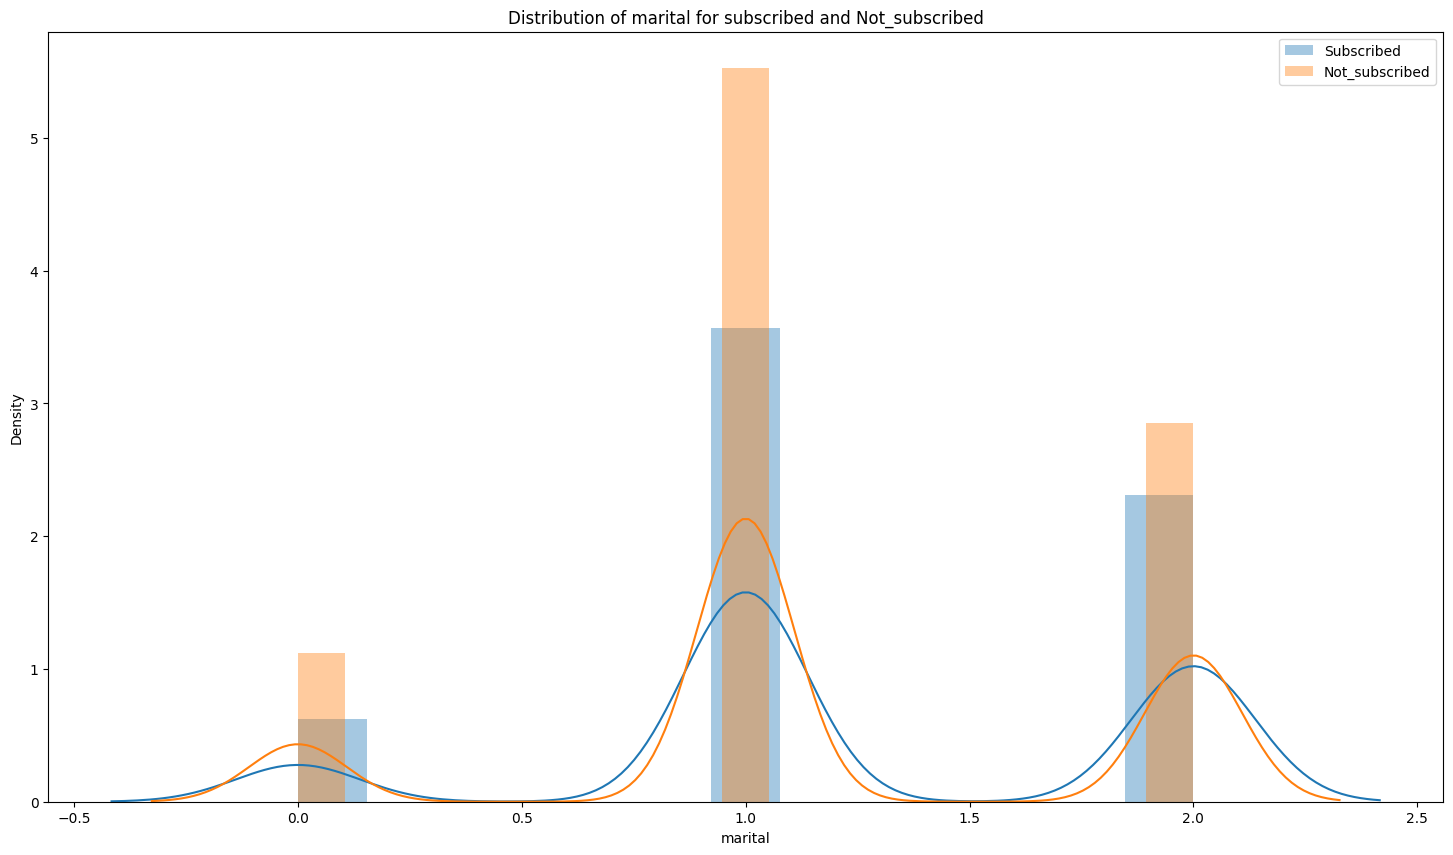

In [ ]:
### Visualizing the distribution of some features for both the classes:

# Plotting marital for both the class labels
marital_subscribed = df_enc[df_enc['target']==1]['marital']
marital_Not_subscribed =df_enc[df_enc['target']==0]['marital']
sns.distplot(marital_subscribed,label='Subscribed') # hist=False
sns.distplot(marital_Not_subscribed,label='Not_subscribed') # hist=False
plt.title('Distribution of marital for subscribed and Not_subscribed')
plt.legend()
plt.gcf().set_size_inches((18, 10))
plt.show()

<ipython-input-22-9096104ca8ce>:6: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


<ipython-input-22-9096104ca8ce>:7: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




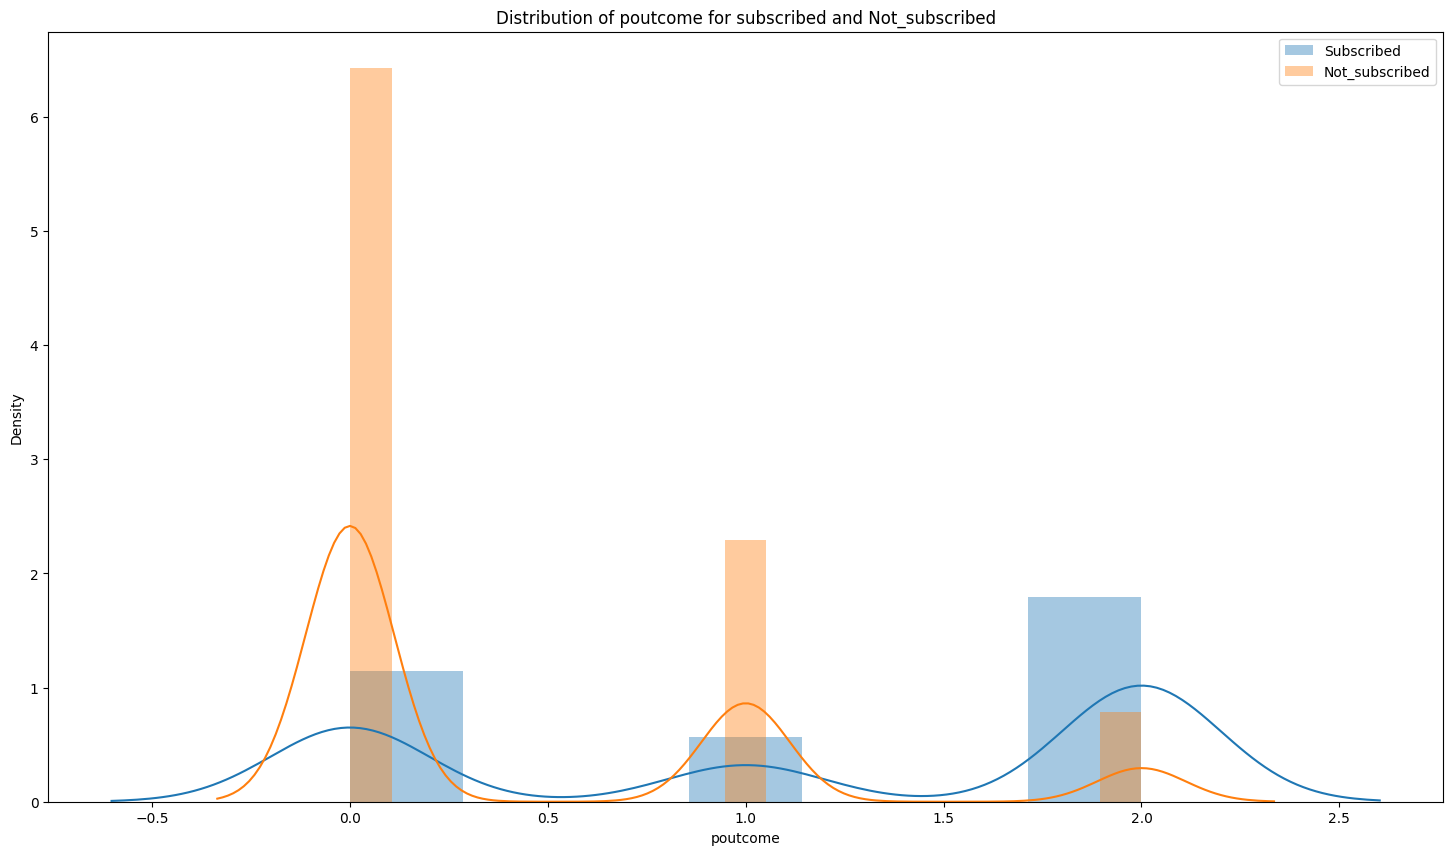

In [ ]:
### Visualizing the distribution of some features for both the classes:

# Plotting Poutcome for both the class labels
poutcome_subscribed = df_enc[df_enc['target']==1]['poutcome']
poutcome_Not_subscribed =df_enc[df_enc['target']==0]['poutcome']
sns.distplot(poutcome_subscribed,label='Subscribed') # hist=False
sns.distplot(poutcome_Not_subscribed,label='Not_subscribed') # hist=False
plt.title('Distribution of poutcome for subscribed and Not_subscribed')
plt.legend()
plt.gcf().set_size_inches((18, 10))
plt.show()

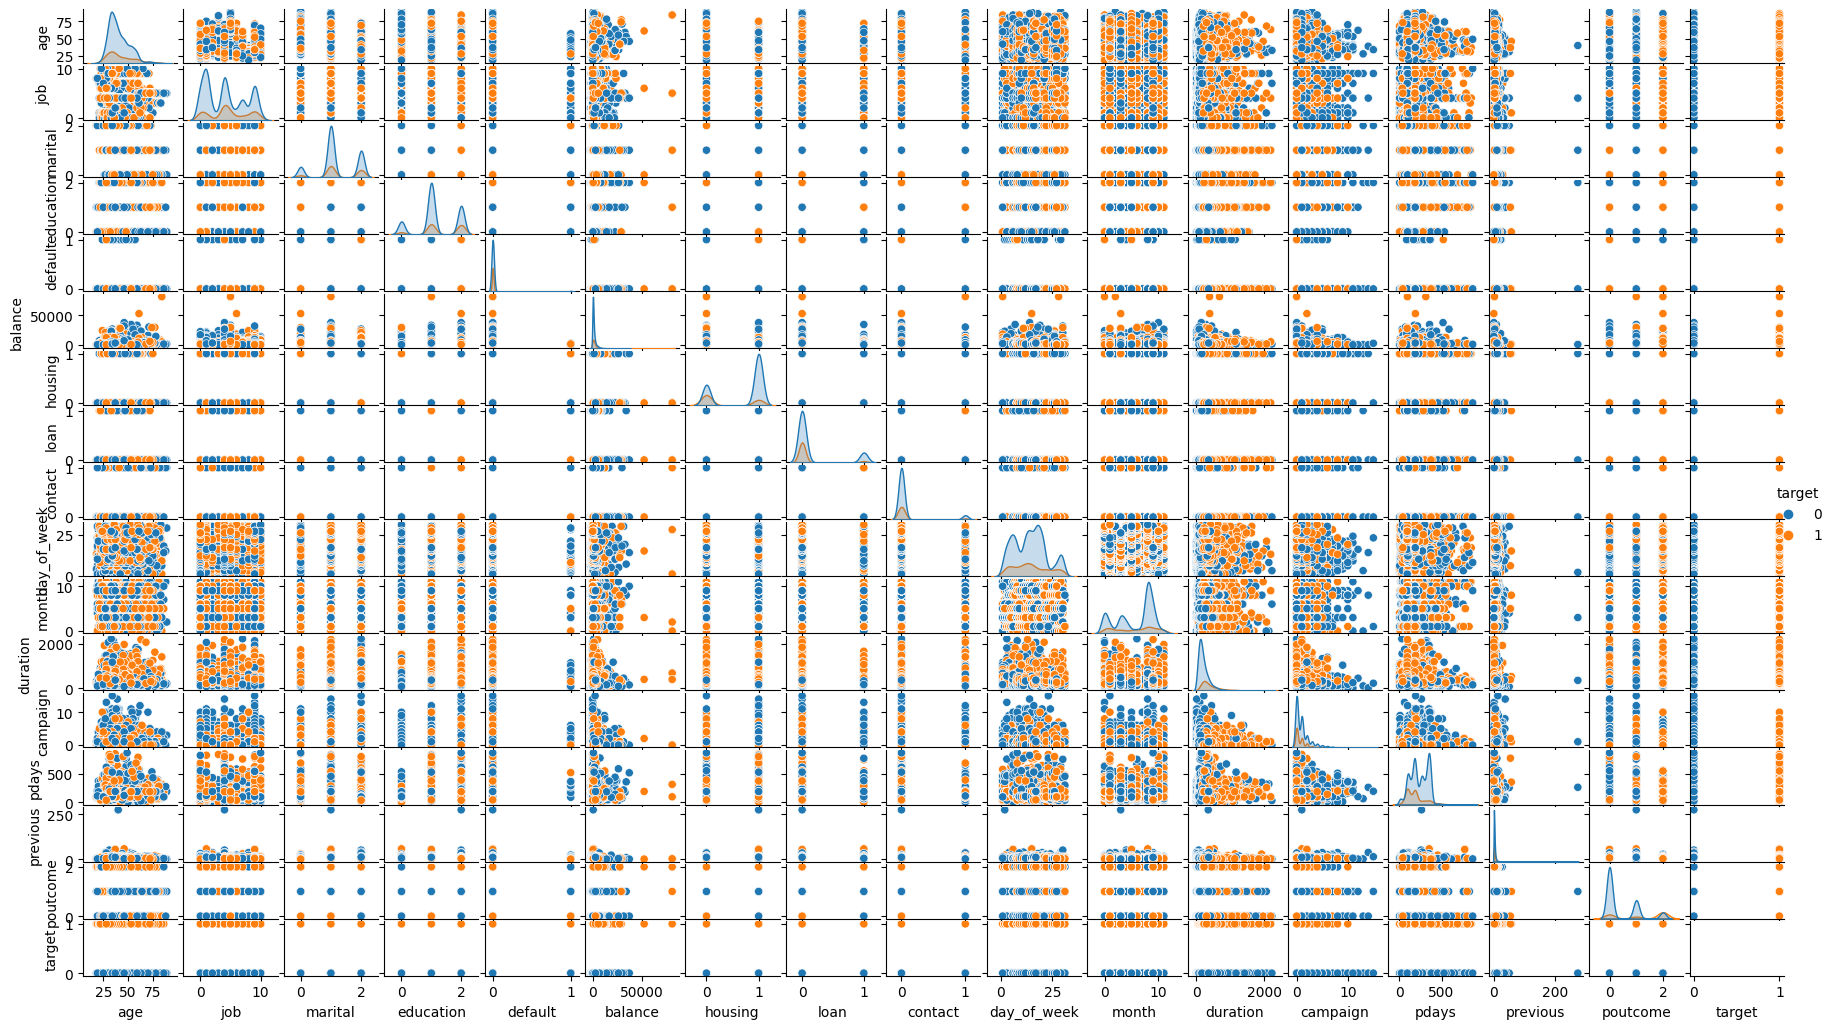

In [ ]:
# Checking Pair Plots:

# Building pair plot
sns.pairplot(df_enc,vars=df_enc.columns,hue='target')
plt.gcf().set_size_inches((18, 10))

In [ ]:
# Optional
df = df_enc.copy()
df.drop('target', axis=1, inplace= True )


In [ ]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome'],
      dtype='object')

In [ ]:
# Check Feature Correlation:
## Building a correlation matrix

sns.set(style="white", font_scale =1.5)
corr = df.corr()
corr



age       job   marital  education   default   balance  \
age          1.000000 -0.021762 -0.414200  -0.180317 -0.026832  0.117283   
job         -0.021762  1.000000  0.069659   0.169689 -0.019259  0.037574   
marital     -0.414200  0.069659  1.000000   0.136804 -0.002900 -0.022515   
education   -0.180317  0.169689  0.136804   1.000000 -0.010666  0.079308   
default     -0.026832 -0.019259 -0.002900  -0.010666  1.000000 -0.045216   
balance      0.117283  0.037574 -0.022515   0.079308 -0.045216  1.000000   
housing     -0.186924 -0.121541 -0.050807  -0.116914  0.021047 -0.109378   
loan        -0.004433 -0.028431 -0.056143  -0.030710  0.049152 -0.083584   
contact      0.190545 -0.007799 -0.021788  -0.097806 -0.018315  0.046259   
day_of_week  0.015385  0.016220  0.014824   0.017638 -0.001260  0.048348   
month        0.017094 -0.005131 -0.025678  -0.005271  0.023529  0.014498   
duration     0.058902  0.023203 -0.007142  -0.003055 -0.006055  0.040550   
campaign     0.000736 -0.006855 -0.007432  -0.027096 -0.002513 -0.011874   
pdays       -0.106095 -0.105194 -0.006627  -0.160157  0.035643 -0.101847   
previous     0.003396  0.002385  0.004370   0.009883  0.012696  0.001708   
poutcome     0.045006  0.062593  0.046925   0.081391 -0.024716  0.050779   

              housing      loan   contact  day_of_week     month  duration  \
age         -0.186924 -0.004433  0.190545     0.015385  0.017094  0.058902   
job         -0.121541 -0.028431 -0.007799     0.016220 -0.005131  0.023203   
marital     -0.050807 -0.056143 -0.021788     0.014824 -0.025678 -0.007142   
education   -0.116914 -0.030710 -0.097806     0.017638 -0.005271 -0.003055   
default      0.021047  0.049152 -0.018315    -0.001260  0.023529 -0.006055   
balance     -0.109378 -0.083584  0.046259     0.048348  0.014498  0.040550   
housing      1.000000  0.104432 -0.078081    -0.071222  0.014982 -0.072115   
loan         0.104432  1.000000 -0.035421     0.009580 -0.001168 -0.034920   
contact     -0.078081 -0.035421  1.000000    -0.013240  0.023543 -0.003481   
day_of_week -0.071222  0.009580 -0.013240     1.000000 -0.023073 -0.006615   
month        0.014982 -0.001168  0.023543    -0.023073  1.000000 -0.032851   
duration    -0.072115 -0.034920 -0.003481    -0.006615 -0.032851  1.000000   
campaign     0.061631  0.008480  0.109836    -0.028473  0.025592 -0.094348   
pdays        0.349771  0.014861 -0.012790    -0.090031  0.017616 -0.009571   
previous     0.007922  0.014173  0.042098    -0.016000  0.009615 -0.001776   
poutcome    -0.288292 -0.106555  0.019143     0.014807 -0.023511  0.109728   

             campaign     pdays  previous  poutcome  
age          0.000736 -0.106095  0.003396  0.045006  
job         -0.006855 -0.105194  0.002385  0.062593  
marital     -0.007432 -0.006627  0.004370  0.046925  
education   -0.027096 -0.160157  0.009883  0.081391  
default     -0.002513  0.035643  0.012696 -0.024716  
balance     -0.011874 -0.101847  0.001708  0.050779  
housing      0.061631  0.349771  0.007922 -0.288292  
loan         0.008480  0.014861  0.014173 -0.106555  
contact      0.109836 -0.012790  0.042098  0.019143  
day_of_week -0.028473 -0.090031 -0.016000  0.014807  
month        0.025592  0.017616  0.009615 -0.023511  
duration    -0.094348 -0.009571 -0.001776  0.109728  
campaign     1.000000  0.063530  0.137044  0.001982  
pdays        0.063530  1.000000 -0.026708 -0.243030  
previous     0.137044 -0.026708  1.000000  0.041444  
poutcome     0.001982 -0.243030  0.041444  1.000000

<ipython-input-27-b0445fc90f07>:1: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



<Axes: >

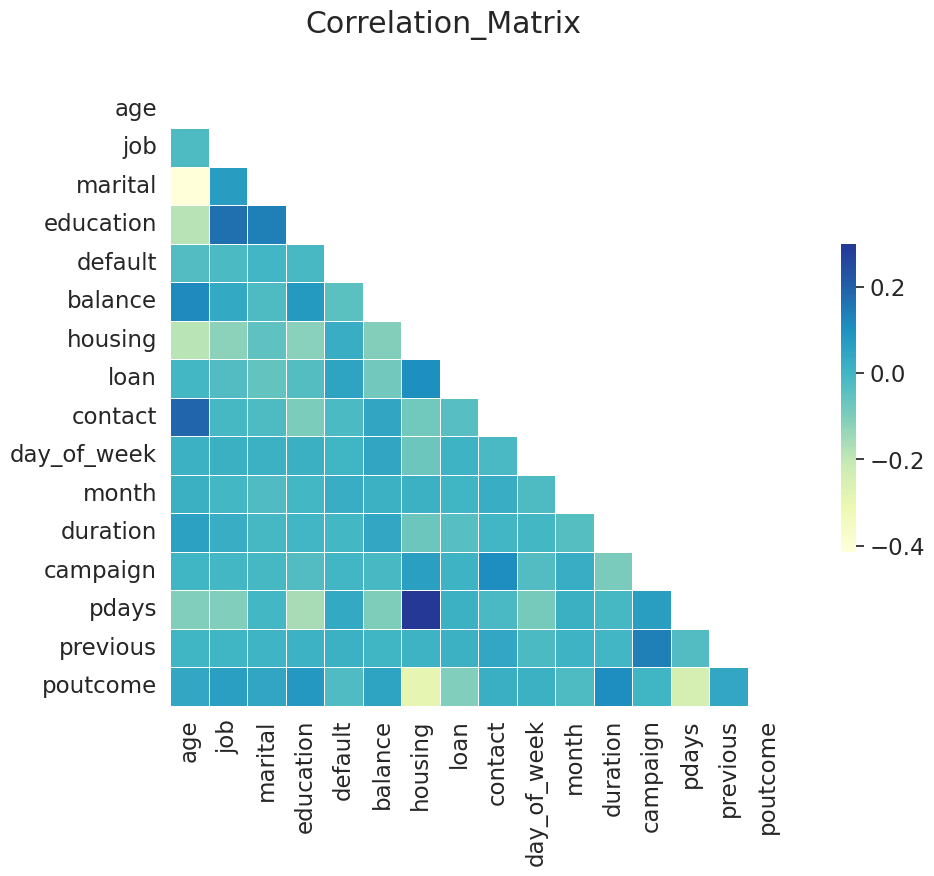

In [ ]:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f,ax = plt.subplots(figsize=(14,8))
f.suptitle('Correlation_Matrix')

#cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap='YlGnBu', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

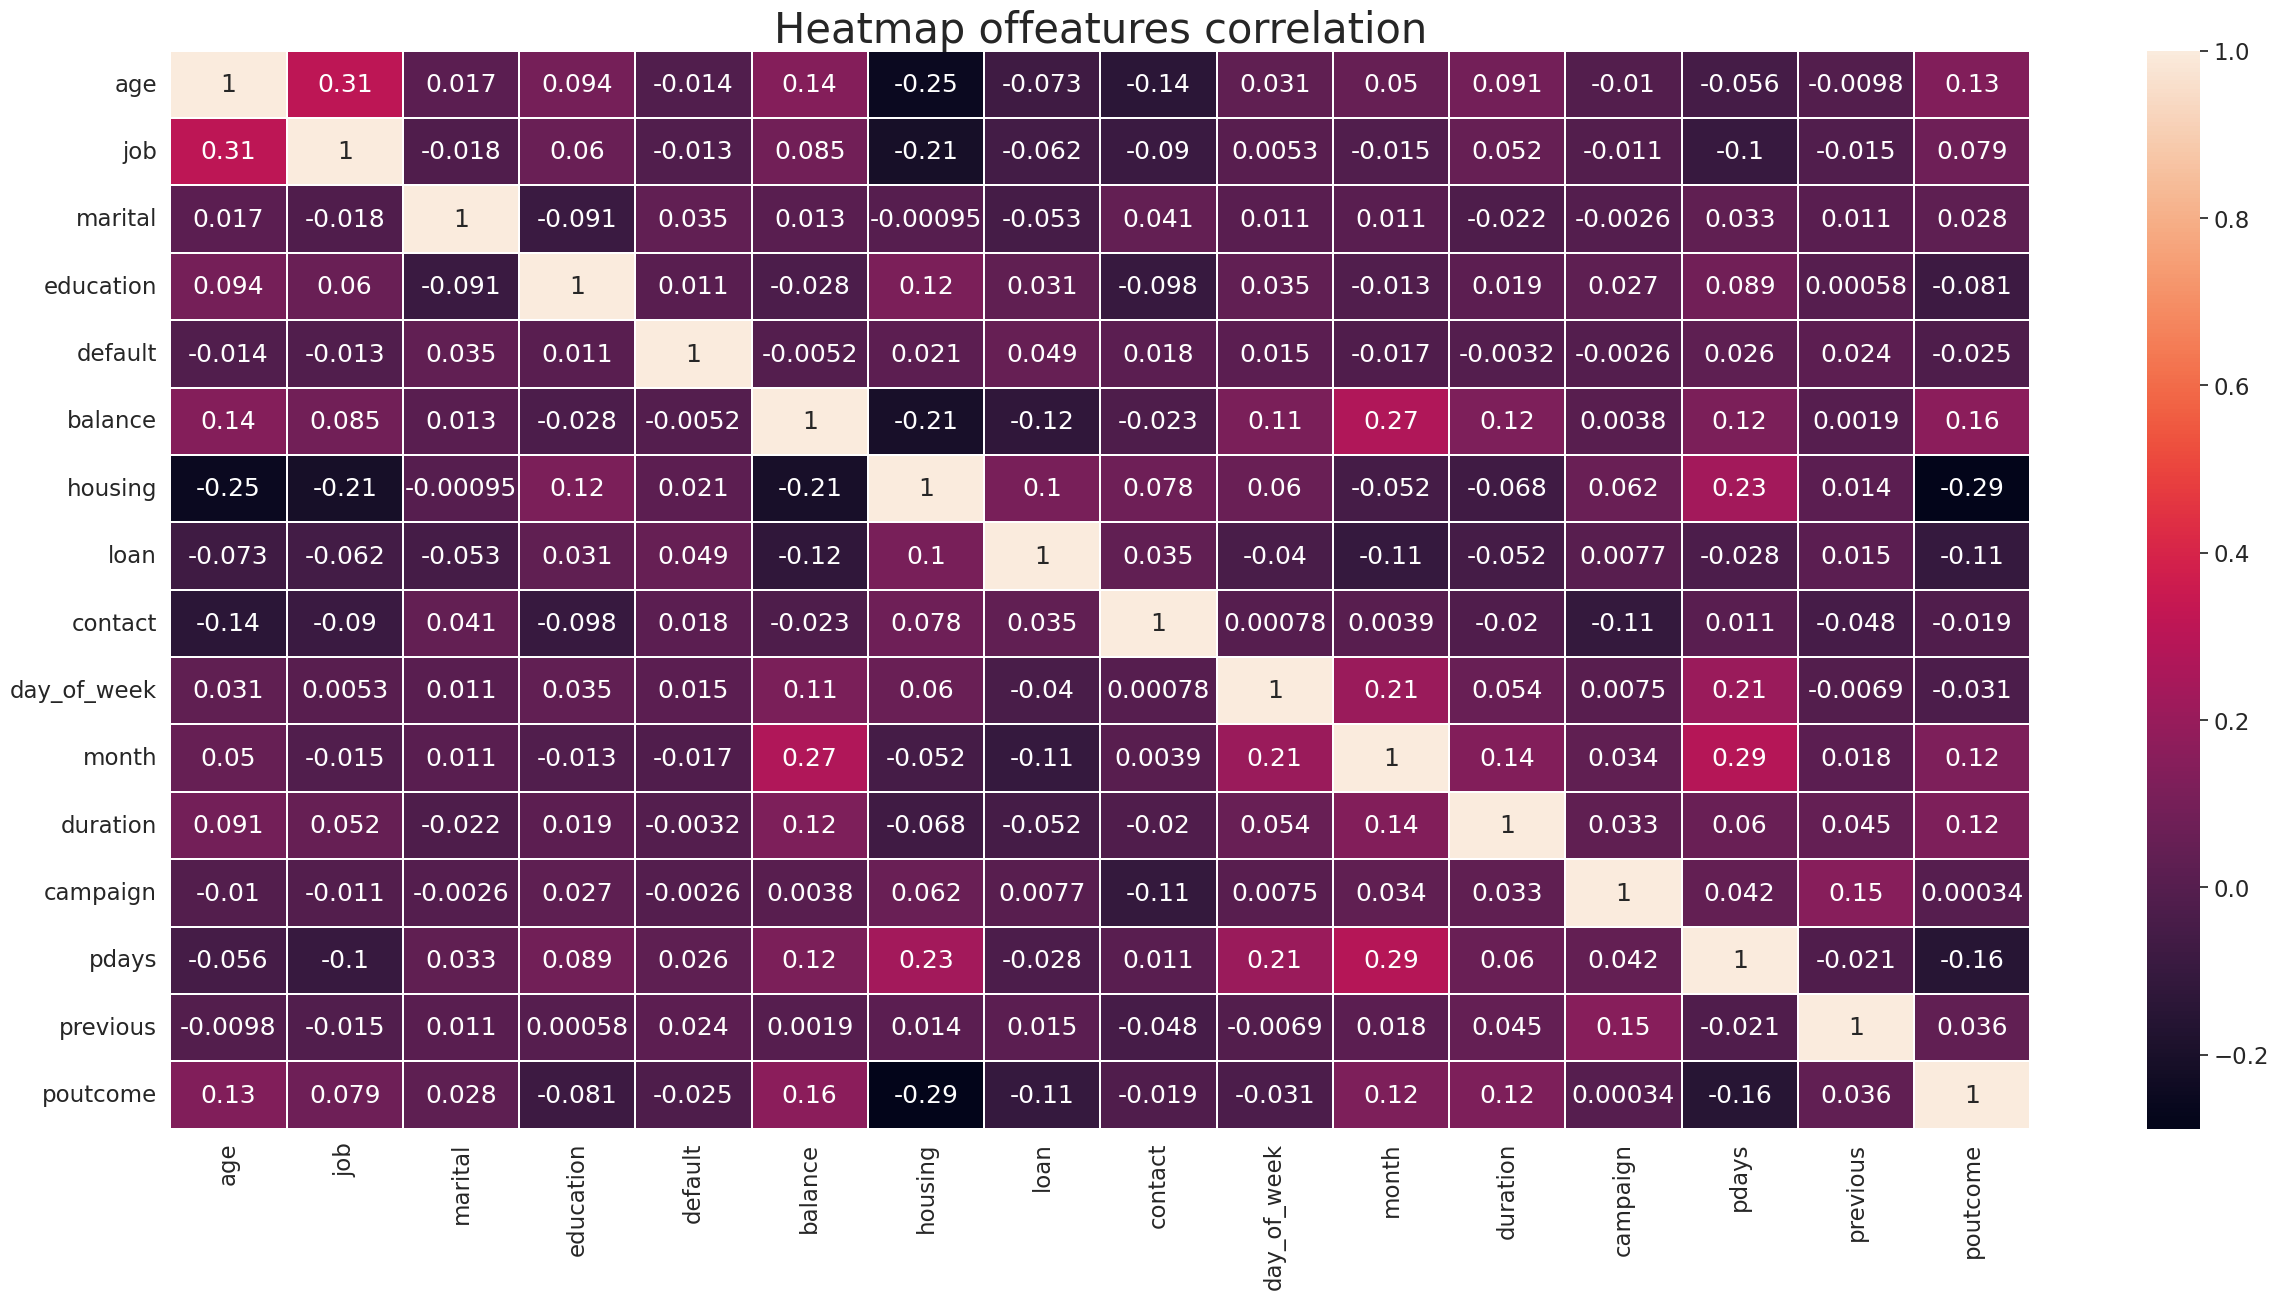

In [ ]:
# Another plot for correlation between features

sns.set(style="white", font_scale =1.5)
corr3 = df.apply(lambda x: pd.factorize(x)[0]).corr()
sns.heatmap(corr3, xticklabels = corr3.columns, yticklabels = corr3.columns, linewidths=0.2, annot = True)
plt.title('Heatmap offeatures correlation',  fontsize=30)
plt.gcf().set_size_inches((30, 14))

In [ ]:
df_enc.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day_of_week', 'month', 'duration', 'campaign',
       'pdays', 'previous', 'poutcome', 'target'],
      dtype='object')

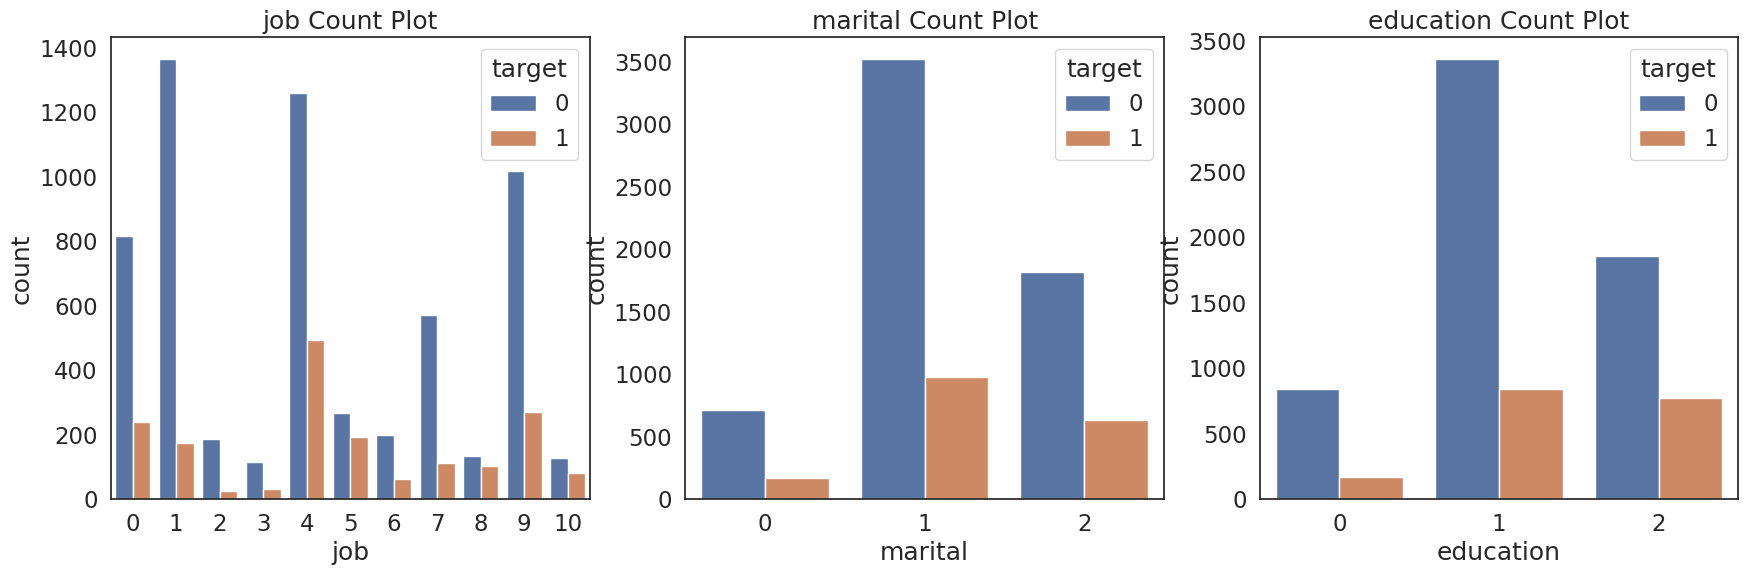

In [ ]:
# Customer account information

count_group(df_enc,['job', 'marital', 'education'],set_hue='target',set_palette='deep')


<ipython-input-33-80a31ce1514a>:40: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




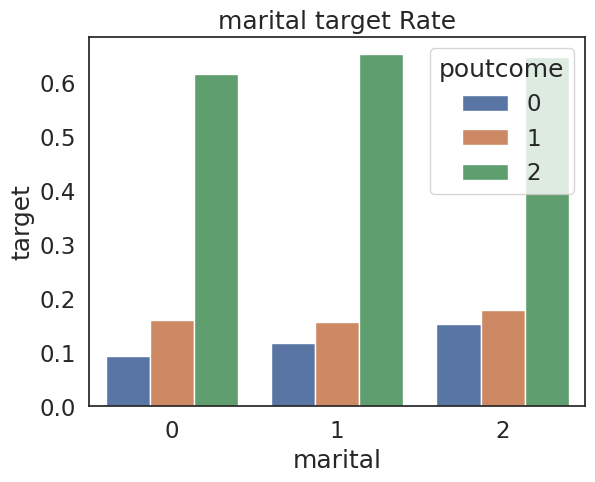

In [ ]:
# Customer Account info
churn_rate(df_enc,'marital','poutcome')



> # Training section

The prepared dataset will be fetched to the model for training and testing purpose.



In [ ]:
# Split the dataset

X = df_enc.drop("target",axis=1)
y = df_enc[["target"]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True , random_state=99)

> ## XGBoost Train


In [ ]:
# fit model
xgb_est = XGBClassifier()
xgb_est.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:
y_pred_class = xgb_est.predict(X_test)
y_pred_train = xgb_est.predict(X_train)

print('XGB Train Accuracy: {}'.format(accuracy_score(y_train, y_pred_train)))
print('XGB Test Acuuracy: {}'.format(accuracy_score(y_test, y_pred_class)))

XGB Train Accuracy: 0.994579945799458
XGB Test Acuuracy: 0.8527724665391969


In [ ]:
# make predictions
y_pred_proba = xgb_est.predict_proba(X_test)
y_pred = xgb_est.predict(X_test)

y_test["predicted_xgb"] = y_pred
y_test["predicted_proba_xgb"] = y_pred_proba[:,1]
y_test.head()

target  predicted_xgb  predicted_proba_xgb
35964       0              0             0.001130
38034       0              0             0.038404
36884       0              0             0.003012
30274       0              0             0.000120
32487       0              0             0.008413

> ## SVM Train


In [ ]:
# fit model

svm_est = SVC(gamma='auto', probability=True)
svm_est.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



SVC(gamma='auto', probability=True)

In [ ]:
y_pred_class2 = svm_est.predict(X_test)
y_pred_train = svm_est.predict(X_train)

print('SVM Train Accuracy: {}'.format(accuracy_score(y_train, y_pred_train)))
print('SVM Test Accuracy: {}'.format(accuracy_score(y_test.target, y_pred_class2)))


SVM Train Accuracy: 1.0
SVM Test Accuracy: 0.7839388145315488


In [ ]:
# make predictions
y_pred_proba = svm_est.predict_proba(X_test)
y_pred = svm_est.predict(X_test)

y_test["predicted_svm"] = y_pred
y_test["predicted_proba_svm"] = y_pred_proba[:,1]
y_test.head()

target  predicted_xgb  predicted_proba_xgb  predicted_svm  \
35964       0              0             0.001130              0   
38034       0              0             0.038404              0   
36884       0              0             0.003012              0   
30274       0              0             0.000120              0   
32487       0              0             0.008413              0   

       predicted_proba_svm  
35964             0.231321  
38034             0.230654  
36884             0.230654  
30274             0.230654  
32487             0.230654

> ## Random Forest Train


In [ ]:
# fit model
rf_est = RandomForestClassifier(max_depth=10, random_state=0)
rf_est.fit(X_train, y_train)

<ipython-input-72-06a50b8dbe27>:3: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



RandomForestClassifier(max_depth=10, random_state=0)

In [ ]:
y_pred_class = rf_est.predict(X_test)
y_pred_train = rf_est.predict(X_train)

print('Random Forest Train Accuracy: {}'.format(accuracy_score(y_train, y_pred_train)))
print('Random Forest Test Acuuracy: {}'.format(accuracy_score(y_test.target, y_pred_class)))

Random Forest Train Accuracy: 0.931930495775546
Random Forest Test Acuuracy: 0.8610579987253028


In [ ]:
# make predictions
y_pred_proba = rf_est.predict_proba(X_test)
y_pred = rf_est.predict(X_test)

y_test["predicted_rfc"] = y_pred
y_test["predicted_proba_rfc"] = y_pred_proba[:,1]
y_test.head()

target  predicted_xgb  predicted_proba_xgb  predicted_svm  \
35964       0              0             0.001130              0   
38034       0              0             0.038404              0   
36884       0              0             0.003012              0   
30274       0              0             0.000120              0   
32487       0              0             0.008413              0   

       predicted_proba_svm  predicted_rfc  predicted_proba_rfc  
35964             0.231321              0             0.013163  
38034             0.230654              0             0.283956  
36884             0.230654              0             0.013412  
30274             0.230654              0             0.021121  
32487             0.230654              0             0.052236

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_0, *['predicted_proba_xgb'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_1, *['predicted_proba_svm'], **{})
chart

import numpy as np
from google.colab import autoviz

def histogram(df, colname, num_bins=20, figscale=1):
  from matplotlib import pyplot as plt
  df[colname].plot(kind='hist', bins=num_bins, title=colname, figsize=(8*figscale, 4*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = histogram(_df_2, *['predicted_proba_rfc'], **{})
chart

import numpy as np
from google.colab import autoviz

def scatter_plots(df, colname_pairs, figscale=1, alpha=.8):
  from matplotlib import pyplot as plt
  plt.figure(figsize=(len(colname_pairs) * 6 * figscale, 6 * figscale))
  for plot_i, (x_colname, y_colname) in enumerate(colname_pairs, start=1):
    ax = plt.subplot(1, len(colname_pairs), plot_i)
    df.plot(kind='scatter', x=x_colname, y=y_colname, s=(32 * figscale), alpha=alpha, ax=ax)
    ax.spines[['top', 'right',]].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = scatter_plots(_df_3, *[[['predicted_proba_xgb', 'predicted_proba_svm'], ['predicted_proba_svm', 'predicted_proba_rfc']]], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_4, *['target', 'predicted_proba_xgb', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_5, *['target', 'predicted_proba_svm', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_6, *['target', 'predicted_proba_rfc', None], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_7, *['target', 'count()', None], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_8, *['predicted_proba_xgb'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_9, *['predicted_proba_svm'], **{})
chart

import numpy as np
from google.colab import autoviz

def value_plot(df, y, figscale=1):
  from matplotlib import pyplot as plt
  df[y].plot(kind='line', figsize=(8 * figscale, 4 * figscale), title=y)
  plt.gca().spines[['top', 'right']].set_visible(False)
  plt.tight_layout()
  return autoviz.MplChart.from_current_mpl_state()

chart = value_plot(_df_10, *['predicted_proba_rfc'], **{})
chart

> # Evaluation section

After the model was trained and tested, we want to measure the performance of our model. Here we will plot the confusion matrix, AUC, proba disribution, and feature importance from the model.




In [ ]:
# Writing a function for getting auc score for validation
scores_mod = []
def roc_auc(predictions,target):
    '''
    This methods returns the AUC Score when given the Predictions
    and Labels
    '''

    fpr, tpr, thresholds = metrics.roc_curve(target, predictions)
    roc_auc = metrics.auc(fpr, tpr)
    return roc_auc

> ## XGBoost Evaluation

In [ ]:
roc_sc = metrics.roc_auc_score( y_test.target, y_test.predicted_proba_xgb )

models_eva['XGBoost'] = roc_sc
roc_sc

0.9075616950859774

In [ ]:

metrics.roc_auc_score( y_test.target, y_test.predicted_proba_xgb)

0.9075616950859774

In [ ]:
scores_mod.append({'Model': 'XGBoost','AUC_Score': roc_auc( y_test.predicted_proba_xgb,y_test.target)})


In [ ]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers

## If you're using the second cleaning, you can use the following command:
#xgb_predictions = xgb_est.predict(tvec.transform(X_test_cleaned))

## Otherwise, use these commands:
xgb_preds = xgb_est.predict(X_test)

report = metrics.classification_report(y_test.target,xgb_preds, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("yellow", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

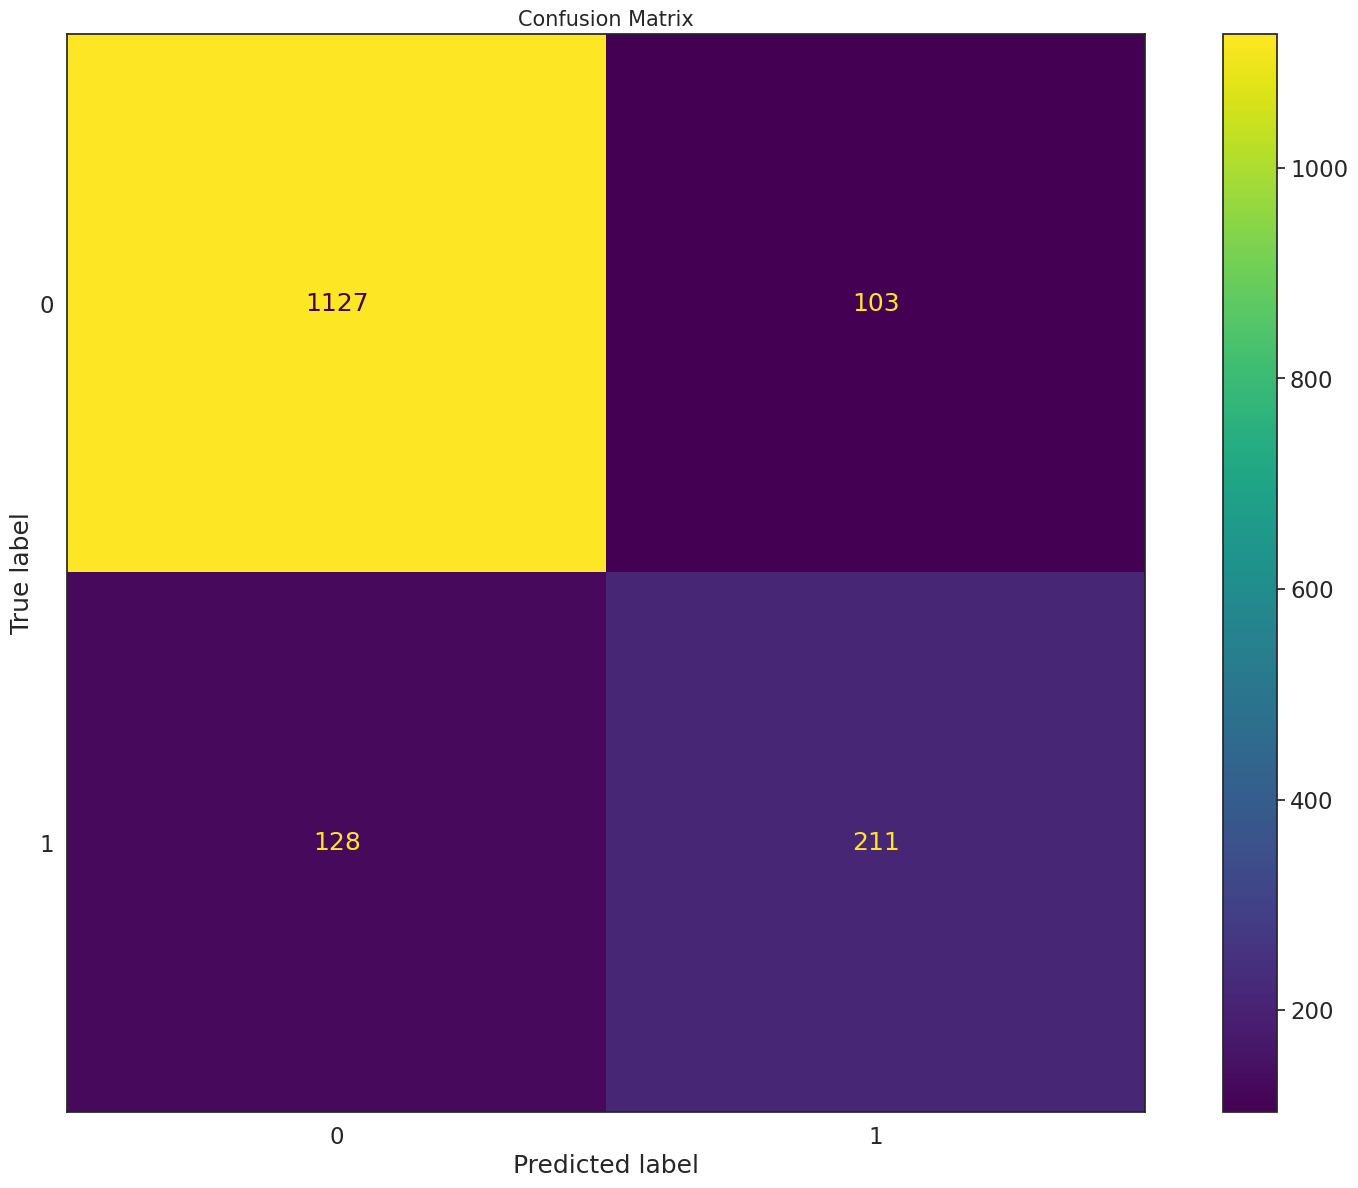

In [ ]:
# First type of Confusion matrix

cm = metrics.confusion_matrix(y_test.target, xgb_preds, labels=xgb_est.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=xgb_est.classes_ ) #cmap='RdBu_r'

disp.plot()
plt.title('Confusion Matrix',  fontsize = 15)
plt.gcf().set_size_inches((20, 14))
plt.show()

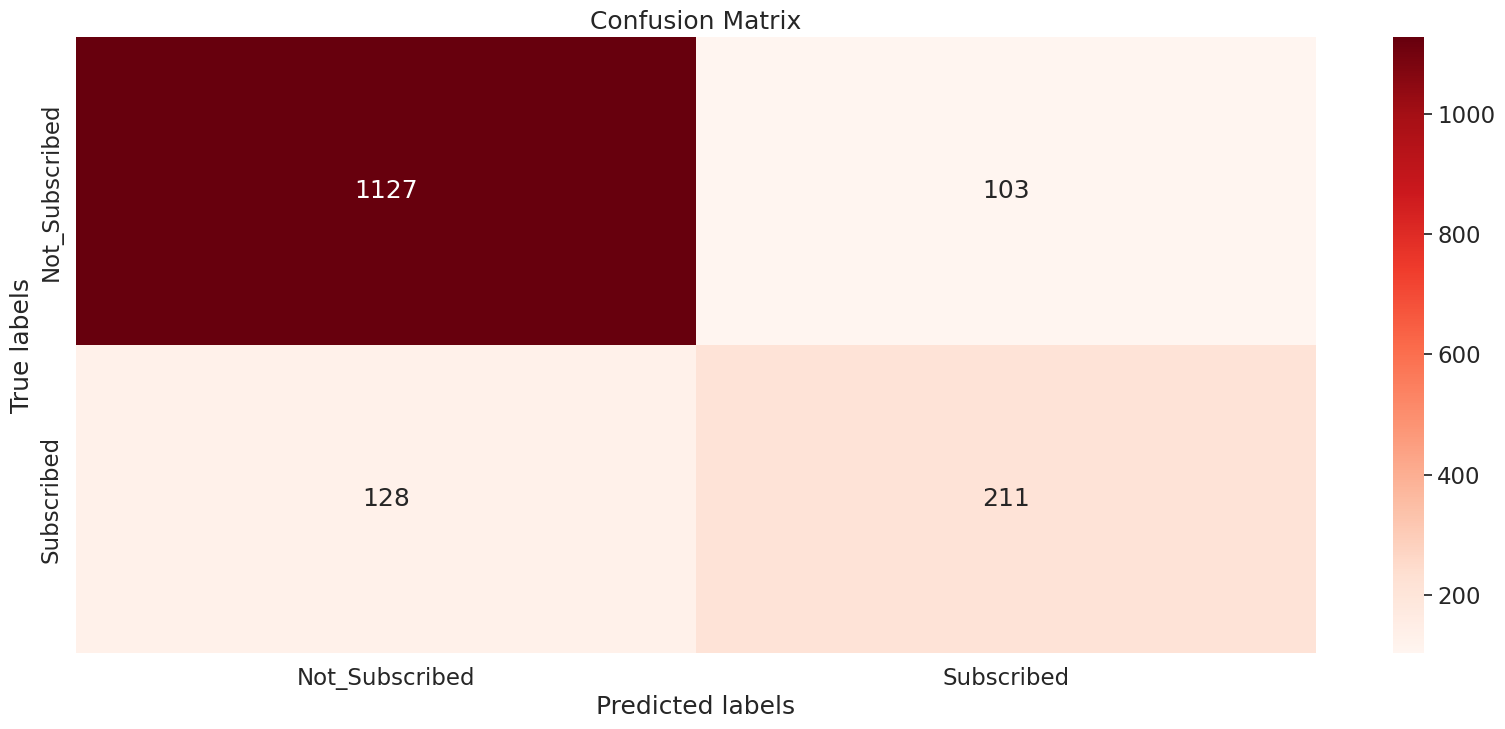

In [ ]:
# Second type of confusion matrix

ax= plt.subplot()
cm= metrics.confusion_matrix(y_test.target,xgb_preds)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not_Subscribed', 'Subscribed']); ax.yaxis.set_ticklabels(['Not_Subscribed', 'Subscribed']);
plt.gcf().set_size_inches((20, 8))
plt.show()

In [ ]:
import plotly.figure_factory as ff

x_axes = ['Not_Subscribed', 'Subscribed']
y_axes =  ['Subscribed', 'Not_Subscribed']

def conf_matrix(z, x=x_axes, y=y_axes):

    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<b>Confusion matrix</b>',
                      xaxis = dict(title='Predicted value'),
                      yaxis = dict(title='Real value')
                     )

    # add colorbar
    fig['data'][0]['showscale'] = True

    return fig

In [ ]:
# Third type of confusion Matrix

conf_matrix(metrics.confusion_matrix(y_test.target, xgb_preds))


In [ ]:
'''
For CM:

supported values are:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r',
'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r',
'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',
'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r',
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r',
'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r',
'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral',
'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd',
'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r',
'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest',
'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray',
'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',
'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r',
'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magm..





'''

> #### Save the XGB model

In [ ]:
import pickle


filename = "xgb_est.sav"

# Save the trained model as a pickle string.
pickle.dump(xgb_est,open(filename, "wb") )

## Load the pickled model
xgb_from_pickle = pickle.load(open(filename, "rb"))


# Use the loaded pickled model to make predictions
print("*************  The model results:  ***********\n", xgb_from_pickle.predict(X_test))




*************  The model results:  ***********
 [0 0 0 ... 0 0 0]


> ## SVM evaluation

In [ ]:
metrics.roc_auc_score( y_test.target, y_test.predicted_proba_svm )

0.40301940187543467

In [ ]:
scores_mod.append({'Model': 'SVM','AUC_Score': roc_auc( y_test.predicted_proba_svm,y_test.target)})


In [ ]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers


## Otherwise, use these commands:
svm_preds = svm_est.predict(X_test)

report = metrics.classification_report(y_test.target,svm_preds, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("yellow", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



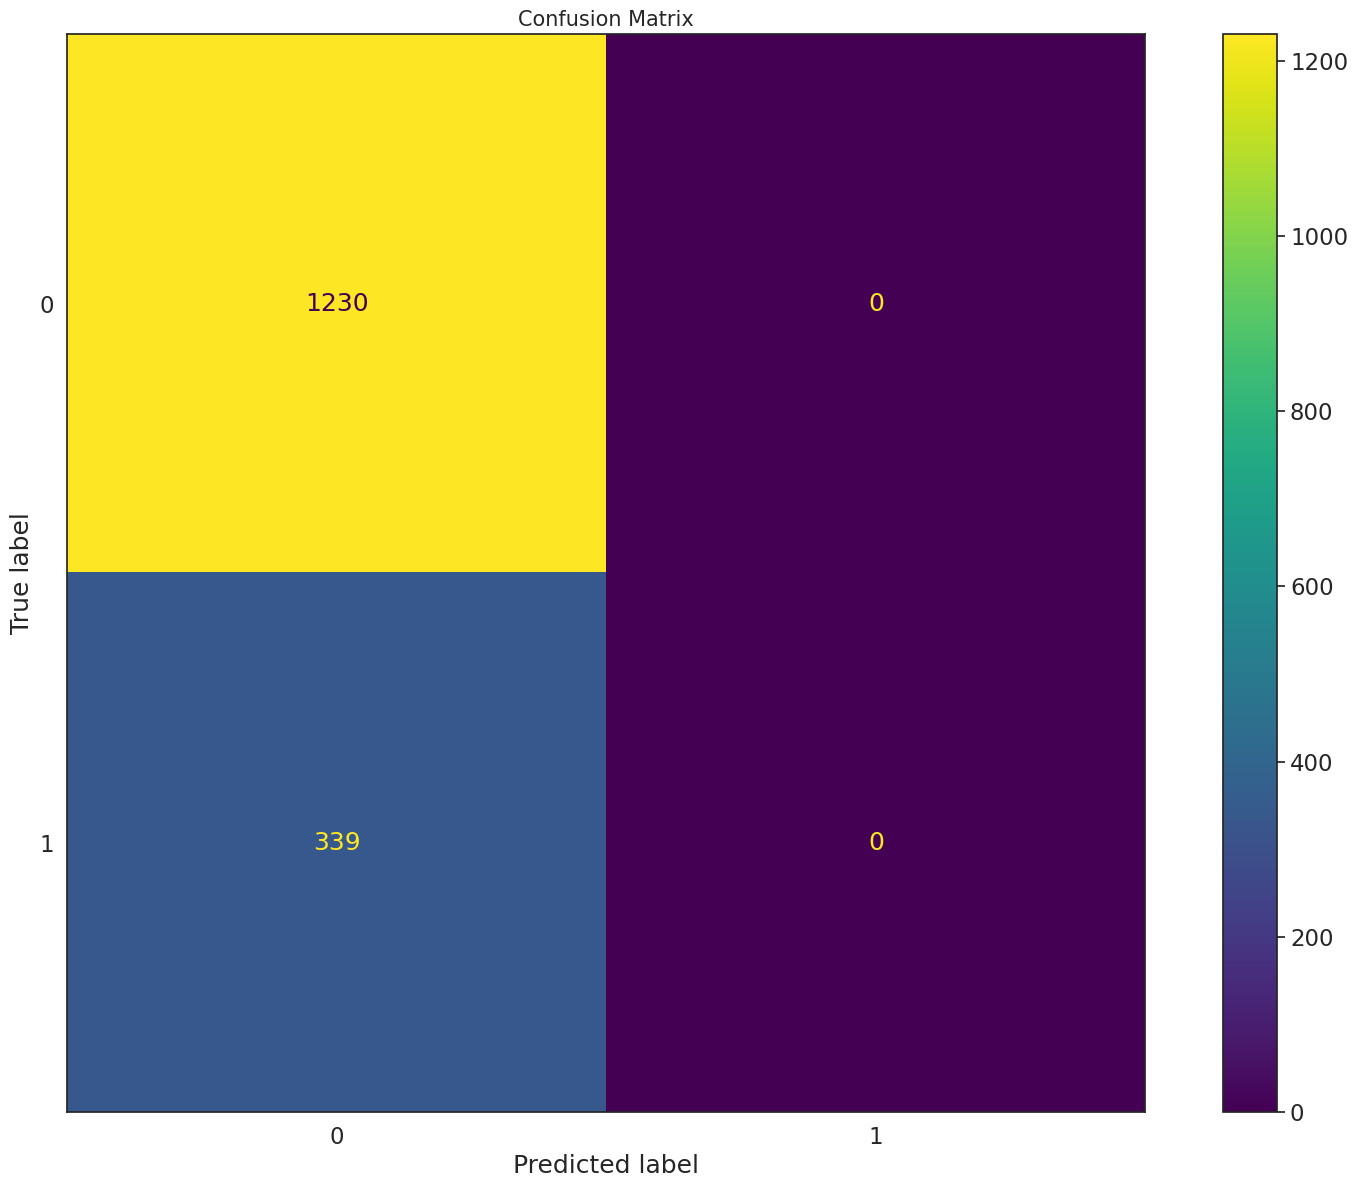

In [ ]:
# First type of Confusion matrix

cm = metrics.confusion_matrix(y_test.target, svm_preds, labels=svm_est.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=svm_est.classes_ ) #cmap='RdBu_r'

disp.plot()
plt.title('Confusion Matrix',  fontsize = 15)
plt.gcf().set_size_inches((20, 14))
plt.show()

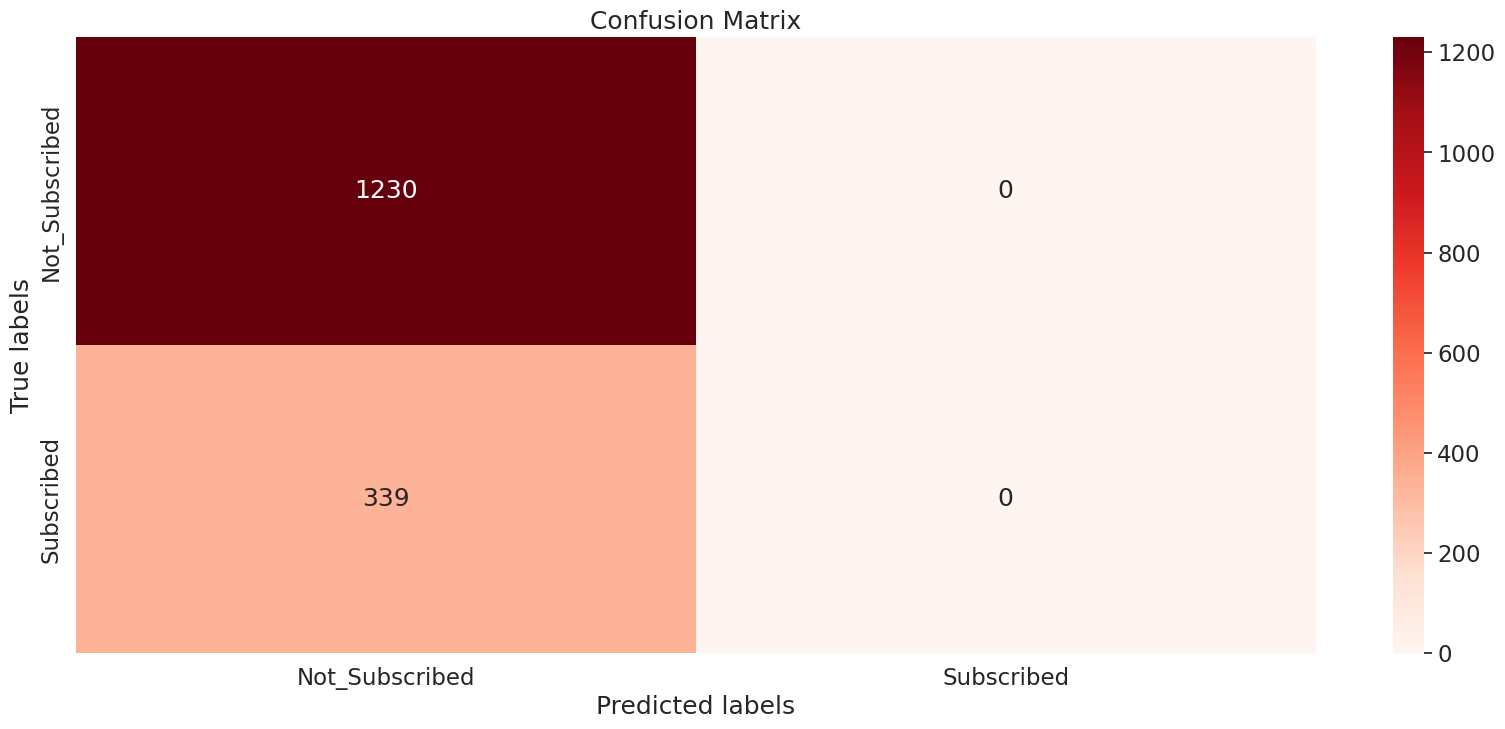

In [ ]:
# Second type of confusion matrix

ax= plt.subplot()
cm= metrics.confusion_matrix(y_test.target,svm_preds)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Confusion Matrix');
ax.xaxis.set_ticklabels(['Not_Subscribed', 'Subscribed']); ax.yaxis.set_ticklabels(['Not_Subscribed', 'Subscribed']);
plt.gcf().set_size_inches((20, 8))
plt.show()

In [ ]:
import plotly.figure_factory as ff

x_axes = ['Not_Subscribed', 'Subscribed']
y_axes =  ['Subscribed', 'Not_Subscribed']

def conf_matrix(z, x=x_axes, y=y_axes):

    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<b>Confusion matrix</b>',
                      xaxis = dict(title='Predicted value'),
                      yaxis = dict(title='Real value')
                     )

    # add colorbar
    fig['data'][0]['showscale'] = True

    return fig

In [ ]:
# Third type of confusion Matrix

conf_matrix(metrics.confusion_matrix(y_test.target, svm_preds))


In [ ]:
'''
For CM:

supported values are:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r',
'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r',
'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',
'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r',
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r',
'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r',
'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral',
'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd',
'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r',
'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest',
'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray',
'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',
'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r',
'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magm..





'''

> #### Save the SVM model

In [ ]:
import pickle


filename = "svm_est.sav"

# Save the trained model as a pickle string.
pickle.dump(svm_est,open(filename, "wb") )

## Load the pickled model
svm_from_pickle = pickle.load(open(filename, "rb"))


# Use the loaded pickled model to make predictions
print("*************  The model results:  ***********\n", svm_from_pickle.predict(X_test))




*************  The model results:  ***********
 [0 0 0 ... 0 0 0]


> ## Random Forest evaluation

In [ ]:
# feature_importance

feature_importance = pd.DataFrame()
feature_importance["feature"] = X.columns
feature_importance["value"] = rf_est.feature_importances_
feature_importance = feature_importance.sort_values("value", ascending=False).reset_index(drop=True)


In [ ]:
metrics.roc_auc_score( y_test.target, y_test.predicted_proba_rfc )

0.9059788473990935

In [ ]:
scores_mod.append({'Model': 'Random Forest','AUC_Score': roc_auc( y_test.predicted_proba_rfc,y_test.target)})

In [ ]:
# Predict using training and testing data and display the accuracy, f-1 score, precision for Positive and Negative Sentiment Classifiers

## If you're using the second cleaning, you can use the following command:
#xgb_predictions = xgb_est.predict(tvec.transform(X_test_cleaned))

## Otherwise, use these commands:
rf_preds = rf_est.predict(X_test)

report = metrics.classification_report(y_test.target,rf_preds, output_dict=True)
data_report = pd.DataFrame(report).transpose().round(2)
cm = sns.light_palette("blue", as_cmap=True)
data_report.style.background_gradient(cmap=cm)

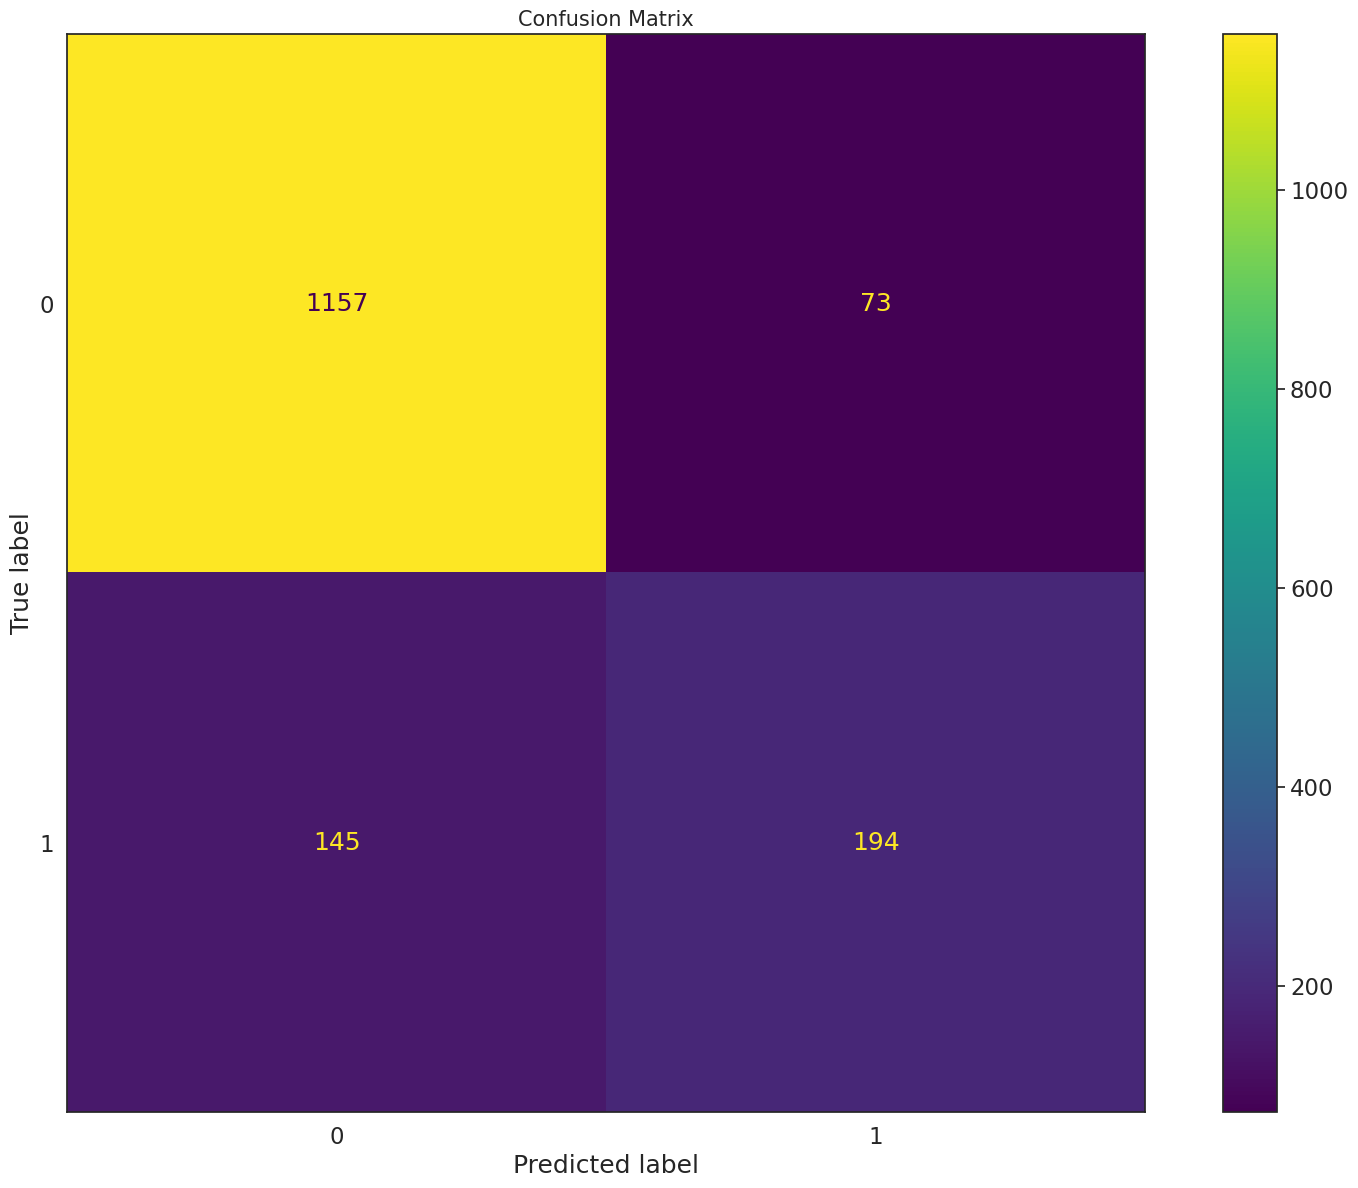

In [ ]:
# First type of Confusion matrix

cm = metrics.confusion_matrix(y_test.target, rf_preds, labels=rf_est.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm,  display_labels=rf_est.classes_ ) #cmap='RdBu_r'

disp.plot()
plt.title('Confusion Matrix',  fontsize = 15)
plt.gcf().set_size_inches((20, 14))
plt.show()

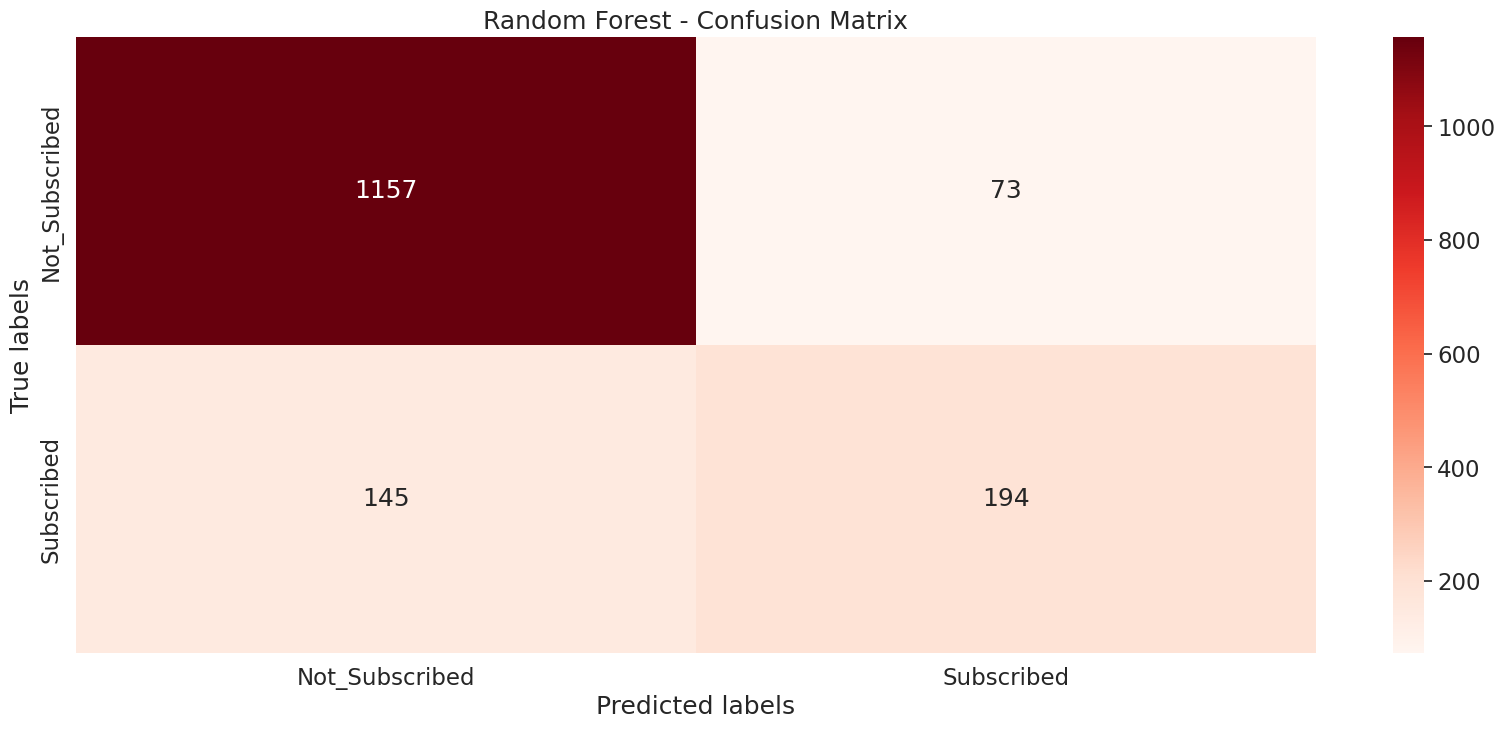

In [ ]:
# Second type of confusion matrix

ax= plt.subplot()
cm= metrics.confusion_matrix(y_test.target,rf_preds)
sns.heatmap(cm, annot=True, fmt='g', ax=ax,cmap='Reds');
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels');
ax.set_title('Random Forest - Confusion Matrix');
ax.xaxis.set_ticklabels(['Not_Subscribed', 'Subscribed']); ax.yaxis.set_ticklabels(['Not_Subscribed', 'Subscribed']);
plt.gcf().set_size_inches((20, 8))
plt.show()

In [ ]:
import plotly.figure_factory as ff

x_axes = ['Not_Subscribed', 'Subscribed']
y_axes =  ['Subscribed', 'Not_Subscribed']

def conf_matrix(z, x=x_axes, y=y_axes):

    z = np.flip(z, 0)

    # change each element of z to type string for annotations
    z_text = [[str(y) for y in x] for x in z]

    # set up figure
    fig = ff.create_annotated_heatmap(z, x=x, y=y, annotation_text=z_text, colorscale='Viridis')

    # add title
    fig.update_layout(title_text='<b>Random Forest - Confusion matrix</b>',
                      xaxis = dict(title='Predicted value'),
                      yaxis = dict(title='Real value'),

                     )

    # add colorbar
    fig['data'][0]['showscale'] = True

    return fig

In [ ]:
# Third type of confusion Matrix

conf_matrix(metrics.confusion_matrix(y_test.target, rf_preds))


In [ ]:
'''
For CM:

supported values are:
'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r',
'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r',
'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r',
'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r',
'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r',
'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r',
'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral',
'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd',
'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r',
'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest',
'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray',
'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern',
'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r',
'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magm..





'''

> #### Save the Random Forest model

In [ ]:
import pickle


filename = "rf_est.sav"

# Save the trained model as a pickle string.
pickle.dump(rf_est,open(filename, "wb") )

## Load the pickled model
rf_from_pickle = pickle.load(open(filename, "rb"))


# Use the loaded pickled model to make predictions
print("*************  The model results:  ***********\n", rf_from_pickle.predict(X_test))




*************  The model results:  ***********
 [0 0 0 ... 0 0 0]


> # Conclusion

In [ ]:
# Visualization of Results obtained from various machine models
f_results = pd.DataFrame(scores_mod).sort_values(by='AUC_Score',ascending=False)
f_results.style.background_gradient(cmap='gray')
